## Heart Attack Analysis & Prediction

About this project
Heart disease remains a significant cause of death worldwide, underscoring the urgent necessity for precise and timely prediction methods. In this project, we use predictive analytics to construct a model that can identify individuals predisposed to experiencing a heart attack.

Throughout this project, we will look into the dataset, conduct thorough data analysis, preprocess the data to ensure its integrity and suitability for modeling, and ultimately develop and assess predictive models.

# Problem Definition

Our goal is to establish a robust and accurate predictive model and to obtain insights into the underlying factors contributing to the risk of heart disease, allowing us to see what factors contributes more to the risk of heart disease.




# Step 1| Import Libraries

In [1]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')


# Data Manipulation
import numpy as np
import pandas as pd

# Visualizations
import seaborn as sns
import matplotlib.pyplot as plt 
from scipy.stats import boxcox

# Preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Model Selection
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

# SVM 
from sklearn.svm import SVC

# Decision Tree 
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Random Forest 
from sklearn.ensemble import RandomForestClassifier

# Metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, make_scorer

# Step 2 | Reading Dataset

In [2]:
heart_df= pd.read_csv('heart.csv')

In [3]:
heart_df = pd.DataFrame(heart_df)

In [4]:
heart_df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [5]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


 # Step 3 | Dataset Overview & Preparation



 ### Step 3.1 | Description Of Variables

age: Age of the patient in years

sex: Gender of the patient (0: female, 1: male)

cp: Type of chest pain (0: Typical angina, 1: Atypical angina, 2: Non-anginal pain, 3: Asymptomatic)

trtbps: Resting blood pressure in mmHg

chol: Serum cholesterol in mg/dl

fbs: Fasting blood sugar level categorized as above 120 mg/dl (0: false, 1: true)

restecg: Resting electrocardiographic results (0: Normal, 1: ST-T wave abnormality, 2: Showing probable or definite left ventricular hypertrophy)

thalachh: Maximum heart rate achieved during a stress test
exng: Exercise induced angina (0: no, 1: yes)

oldpeak: ST depression induced by exercise relative to rest (unit -> depression)

slp: Slope of the peak exercise ST segment (0: Upsloping, 1: Flat, 2: Downsloping)

caa: Number of major vessels (0-4) colored by fluoroscopy
thall: Thalium stress test result (0: Normal, 1: Fixed defect, 2: Reversible defect, 3: Not described)

exng: exercise induced angina \(1 = yes; 0 = no\)

thall: thallium seems to serve as a variable in medical data analysis, likely providing insights into the presence or absence of certain conditions or abnormalities detected through thallium testing procedures. \(0:"Normal", 1:"Fixed defect", 2:"Reversible defect", 3:"Not described"\)

output: Heart disease status \(0: no disease, 1: presence of disease\)



### Step 3.2 | Renaming the Variables

In [6]:
# Renamed name of variables to have a better understanding while working on dataset:
heart_df.rename(columns={
    "age":"Age",
    "sex":"Sex",
    "cp":"ChestPain",
    "trtbps":"RestingBloodPressure",
    "chol":"Cholesterol",
    "fbs":"FastingBloodSugar",
    "restecg":"RestingECG",
    "thalachh":"MaxHeartRate",
    "exng":"ExcerciseAngina",
    "oldpeak":"OldPeak",
    "slp":"STSlope",
    "caa":"nMajorVessels",
    "thall":"Thalium",
    "output":"Status"
}, inplace=True)

In [7]:
#Changed the integer values of some variables to categorical values based on description of variables:
mappings = {
    'Sex': {
        0: "Female",
        1: "Male"
    },
    'ChestPain': {
        0: "Typical angina",
        1: "Atypical angina",
        2: "Non-anginal pain",
        3: "Asymptomatic"
    },
    "FastingBloodSugar": {
        0:False,
        1:True
    },
    "RestingECG": {
        0:"Normal",
        1:"Abnormality",
        2:"Hypertrophy"
    },
    "ExcerciseAngina": {
        0:"No",
        1:"Yes"
    },
    "STSlope": {
        0:"Upsloping",
        1:"Flat",
        2:"Downsloping"
    },
    "Thalium": {
        0:"Normal",
        1:"Fixed defect",
        2:"Reversible defect",
        3:"Not described"
    },
    "Status": {
        0:"No Disease",
        1:"Heart Disease"
    }
}

In [8]:
def map_values(x, mapping):
    return mapping.get(x, x)

for feature, mapping in mappings.items():
    heart_df[feature] = heart_df[feature].map(lambda x: map_values(x, mapping))
    heart_df[feature] = heart_df[feature].astype(object)

In [9]:
#First five Row
heart_df.head()

,Age,Sex,ChestPain,RestingBloodPressure,Cholesterol,FastingBloodSugar,RestingECG,MaxHeartRate,ExcerciseAngina,OldPeak,STSlope,nMajorVessels,Thalium,Status
0,63,Male,Asymptomatic,145,233,True,Normal,150,No,2.3,Upsloping,0,Fixed defect,Heart Disease
1,37,Male,Non-anginal pain,130,250,False,Abnormality,187,No,3.5,Upsloping,0,Reversible defect,Heart Disease
2,41,Female,Atypical angina,130,204,False,Normal,172,No,1.4,Downsloping,0,Reversible defect,Heart Disease
3,56,Male,Atypical angina,120,236,False,Abnormality,178,No,0.8,Downsloping,0,Reversible defect,Heart Disease
4,57,Female,Typical angina,120,354,False,Abnormality,163,Yes,0.6,Downsloping,0,Reversible defect,Heart Disease


In [10]:
# Last Five Row
heart_df.tail()

,Age,Sex,ChestPain,RestingBloodPressure,Cholesterol,FastingBloodSugar,RestingECG,MaxHeartRate,ExcerciseAngina,OldPeak,STSlope,nMajorVessels,Thalium,Status
298,57,Female,Typical angina,140,241,False,Abnormality,123,Yes,0.2,Flat,0,Not described,No Disease
299,45,Male,Asymptomatic,110,264,False,Abnormality,132,No,1.2,Flat,0,Not described,No Disease
300,68,Male,Typical angina,144,193,True,Abnormality,141,No,3.4,Flat,2,Not described,No Disease
301,57,Male,Typical angina,130,131,False,Abnormality,115,Yes,1.2,Flat,1,Not described,No Disease
302,57,Female,Atypical angina,130,236,False,Normal,174,No,0.0,Flat,1,Reversible defect,No Disease


In [11]:
heart_df

,Age,Sex,ChestPain,RestingBloodPressure,Cholesterol,FastingBloodSugar,RestingECG,MaxHeartRate,ExcerciseAngina,OldPeak,STSlope,nMajorVessels,Thalium,Status
0,63,Male,Asymptomatic,145,233,True,Normal,150,No,2.3,Upsloping,0,Fixed defect,Heart Disease
1,37,Male,Non-anginal pain,130,250,False,Abnormality,187,No,3.5,Upsloping,0,Reversible defect,Heart Disease
2,41,Female,Atypical angina,130,204,False,Normal,172,No,1.4,Downsloping,0,Reversible defect,Heart Disease
3,56,Male,Atypical angina,120,236,False,Abnormality,178,No,0.8,Downsloping,0,Reversible defect,Heart Disease
4,57,Female,Typical angina,120,354,False,Abnormality,163,Yes,0.6,Downsloping,0,Reversible defect,Heart Disease
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,Female,Typical angina,140,241,False,Abnormality,123,Yes,0.2,Flat,0,Not described,No Disease
299,45,Male,Asymptomatic,110,264,False,Abnormality,132,No,1.2,Flat,0,Not described,No Disease
300,68,Male,Typical angina,144,193,True,Abnormality,141,No,3.4,Flat,2,Not described,No Disease
301,57,Male,Typical angina,130,131,False,Abnormality,115,Yes,1.2,Flat,1,Not described,No Disease


In [12]:
heart_df.shape

(303, 14)

 ### Step 3.4 | Basic Information

In [13]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   303 non-null    int64  
 1   Sex                   303 non-null    object 
 2   ChestPain             303 non-null    object 
 3   RestingBloodPressure  303 non-null    int64  
 4   Cholesterol           303 non-null    int64  
 5   FastingBloodSugar     303 non-null    object 
 6   RestingECG            303 non-null    object 
 7   MaxHeartRate          303 non-null    int64  
 8   ExcerciseAngina       303 non-null    object 
 9   OldPeak               303 non-null    float64
 10  STSlope               303 non-null    object 
 11  nMajorVessels         303 non-null    int64  
 12  Thalium               303 non-null    object 
 13  Status                303 non-null    object 
dtypes: float64(1), int64(5), object(8)
memory usage: 33.3+ KB


In [14]:
stats_heart_df = heart_df.copy()

In [15]:
# Statistical summary of numerical data
stats_heart_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
RestingBloodPressure,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
Cholesterol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
MaxHeartRate,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
OldPeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2
nMajorVessels,303.0,0.729373,1.022606,0.0,0.0,0.0,1.0,4.0


In [16]:
# Statistical summary of categorical data
stats_heart_df.describe(include="object").T

,count,unique,top,freq
Sex,303,2,Male,207
ChestPain,303,4,Typical angina,143
FastingBloodSugar,303,2,False,258
RestingECG,303,3,Abnormality,152
ExcerciseAngina,303,2,No,204
STSlope,303,3,Downsloping,142
Thalium,303,4,Reversible defect,166
Status,303,2,Heart Disease,165


Initial observations:

- The dataset is small and well\-organized.
- All entries contain numerical data with no missing values.
- The output column exhibits relatively balanced distribution.



# Step 4 | Exploratary Data Analysis (EDA)



In [17]:
heart_df_eda = heart_df.copy()

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

def box_hist_plot(feature):
    # Set background color for the plot
    plt.rcParams['axes.facecolor'] = '#D6F3FF'
    
     # Create a figure with 1 row and 2 columns for subplots
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))  # 1 row, 2 columns

    # Plot histogram with seaborn
    sns.histplot(heart_df_eda[feature], kde=True, color='#45b1e8', ax=axes[0])

    # Calculate statistical measures
    mean_value = heart_df_eda[feature].mean()
    median_value = heart_df_eda[feature].median()
    mode_value = heart_df_eda[feature].mode().values[0] 
    std_value = heart_df_eda[feature].std()
    min_value = heart_df_eda[feature].min()
    max_value = heart_df_eda[feature].max()

    # Add vertical lines for statistical measures on the histogram plot
    axes[0].axvline(mean_value, color='b', linestyle='-', linewidth=2, label=f'Mean: {mean_value:.2f}')
    axes[0].axvline(median_value, color='r', linestyle='-', linewidth=2, label=f'Median: {median_value:.2f}')
    axes[0].axvline(mode_value, color='m', linestyle='-', linewidth=2, label=f'Mode: {mode_value:.2f}')
    axes[0].axvline(mean_value + std_value, color='b', linestyle='dashed', linewidth=2, label=f'Std +: {std_value:.2f}')
    axes[0].axvline(mean_value - std_value, color='b', linestyle='dashed', linewidth=2, label=f'Std -: {std_value:.2f}')
    axes[0].axvline(min_value, color='orange', linestyle='--', linewidth=2, label=f'Min: {min_value:.2f}')
    axes[0].axvline(max_value, color='orange', linestyle='--', linewidth=2, label=f'Max: {max_value:.2f}')

    # Set title and labels for the histogram plot
    axes[0].set_title(f"Histogram")
    axes[0].set_xlabel(feature)
    axes[0].set_ylabel("Density")
    axes[0].legend()

    # Plot boxplot with seaborn
    sns.boxplot(x=heart_df_eda[feature], ax=axes[1], color='#45b1e8')
    # Add vertical lines for statistical measures on the boxplot
    axes[1].axvline(mean_value, color='b', linestyle='-', linewidth=2)
    axes[1].axvline(median_value, color='r', linestyle='-', linewidth=2)
    axes[1].axvline(mode_value, color='m', linestyle='-', linewidth=2)
    axes[1].axvline(mean_value + std_value, color='b', linestyle='dashed', linewidth=2)
    axes[1].axvline(mean_value - std_value, color='b', linestyle='dashed', linewidth=2)
    axes[1].axvline(min_value, color='orange', linestyle='--', linewidth=2)
    axes[1].axvline(max_value, color='orange', linestyle='--', linewidth=2)
     # Set title and labels for the boxplot
    axes[1].set_title("Box Plot")
    axes[1].set_xlabel(feature)

    # Adjust layout to prevent overlapping of plots
    plt.tight_layout()
    plt.show()


In [19]:
# find outliers using IQR method
def find_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
       
    # Calculate the Interquartile Range (IQR)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers based on the lower and upper bounds
    outlier_condition = (data < lower_bound) | (data > upper_bound)
    # Filter the data to get the outliers
    outliers = data[outlier_condition]
    
    return outliers, lower_bound, upper_bound

In [20]:
outliers = {}

### Step 4.1 | Univariate Analysis

In [21]:

def skewness_dist(df, variable):
    # This function calculates and analyzes the skewness of a specified variable in a DataFrame.

    # Calculate skewness of the specified variable in the DataFrame
    skewness = df[variable].skew()

    # Print the skewness value of the variable with 3 decimal places
    print(f"Skewness of the {variable} variable: {skewness:.3f}")

    # Check the sign of skewness to determine the distribution shape
    if skewness > 0:
        print("The distribution is right-skewed.")
    elif skewness < 0:
        print("The distribution is left-skewed.")
    else:
        print("The distribution is approximately symmetric.")


In [22]:
def bar_donut_chart(variable):
    # This function creates a combined bar and donut chart to visualize the distribution of a categorical variable.

    # Define colors for the charts
    colors = ['#6CB4EE', '#318CE7', '#6495ED', '#87CEFA'] 

    # Get value counts of the specified variable from the DataFrame (heart_df_eda assumed to be defined)
    category_counts = heart_df_eda[variable].value_counts()
    fig, axs = plt.subplots(1, 2, figsize=(14, 4)) 
    bars = axs[0].barh(category_counts.index, category_counts.values, color=colors)
    
    # Set title and labels for the bar plot
    axs[0].set_title(f'{variable} Distribution', fontsize=16)
    axs[0].set_xlabel('Count')
    axs[0].set_ylabel(f'{variable} Types')
    
     # Add counts on the bars
    for bar, value in zip(bars, category_counts.values):
        width = bar.get_width()
        axs[0].text(width, bar.get_y() + bar.get_height() / 2, '%d' % int(width),
                    ha='left', va='center', color='black', fontsize=10)
    status_counts = heart_df_eda[variable].value_counts()
    
    # Create a pie chart (donut chart)
    wedges, texts, autotexts = axs[1].pie(status_counts, labels=status_counts.index, colors=colors, autopct='%1.1f%%', startangle=140)
    centre_circle = plt.Circle((0,0),0.70,fc='white')
    plt.gca().add_artist(centre_circle)
    
    # Set the aspect ratio to be equal to make it a perfect circle
    axs[1].axis('equal')
    plt.tight_layout()
    plt.show()


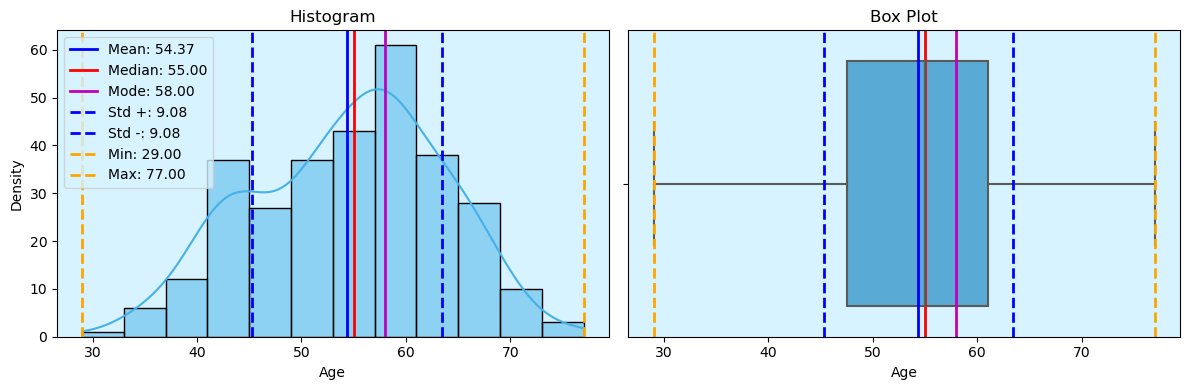

In [23]:
# Age
box_hist_plot("Age")

In [24]:
skewness_dist(heart_df_eda, "Age")

Skewness of the Age variable: -0.202
The distribution is left-skewed.


In [25]:
#Outliers of Age variable
age_outliers, age_lower_bound, age_upper_bound = find_outliers(heart_df_eda['Age'])

print("Lower Bound:", age_lower_bound)
print("Upper Bound:", age_upper_bound)
print("Outliers:", len(age_outliers))

Lower Bound: 27.25
Upper Bound: 81.25
Outliers: 0


In [26]:
outliers.update({"Age":len(age_outliers)})
#There are no outliers in Age variable.

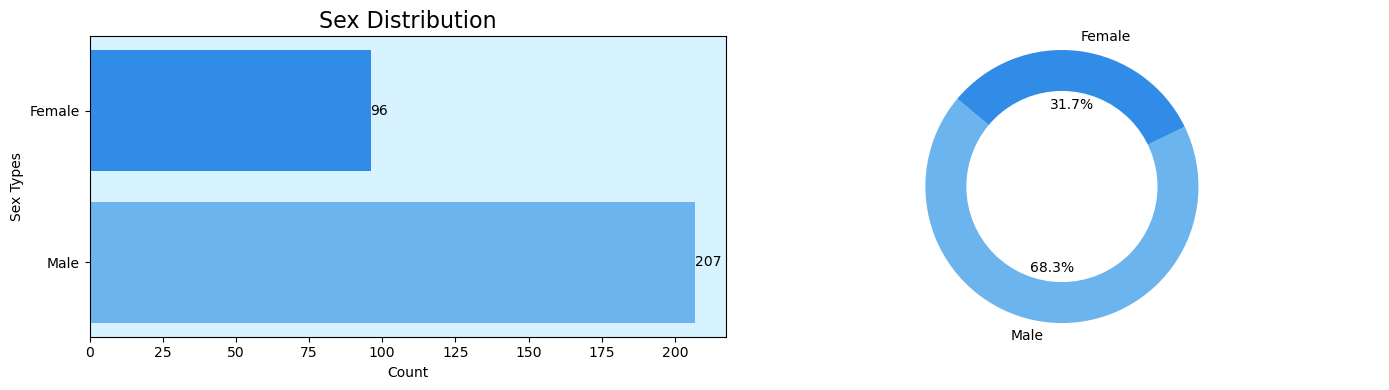

In [27]:
# Sex
bar_donut_chart("Sex")

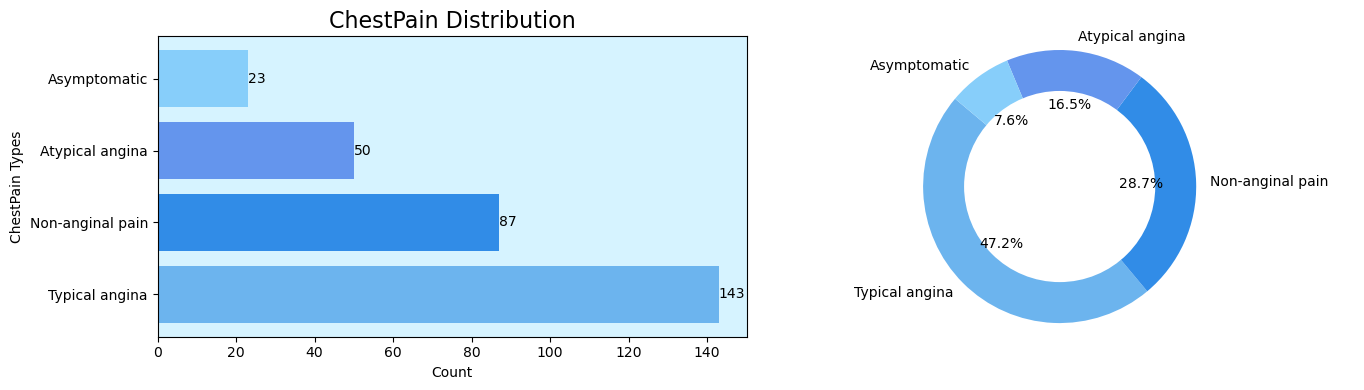

In [28]:
#Chest Pain
bar_donut_chart("ChestPain")

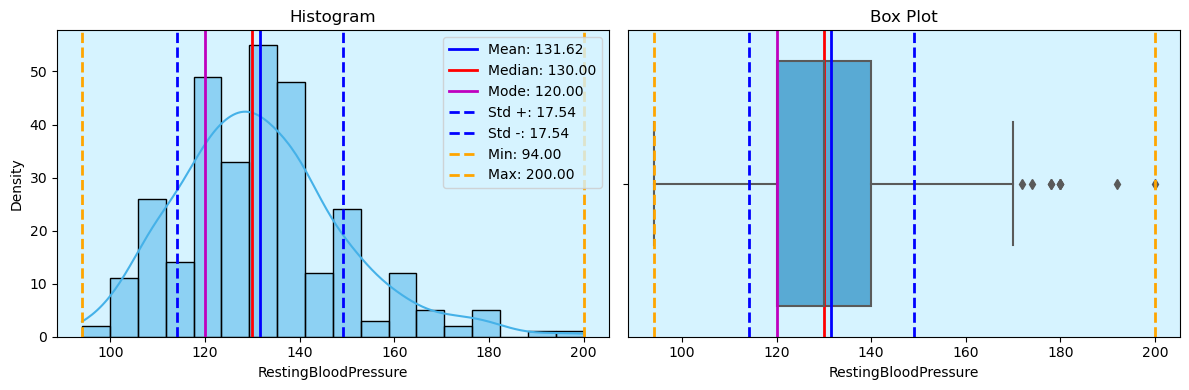

In [29]:
#Resting Blood Pressure
box_hist_plot("RestingBloodPressure")

In [30]:
skewness_dist(heart_df_eda, "RestingBloodPressure")

Skewness of the RestingBloodPressure variable: 0.714
The distribution is right-skewed.


In [31]:
#Outliers of Resting Blood Pressure column:
rbp_outliers, rbp_lower_bound, rbp_upper_bound = find_outliers(heart_df_eda['RestingBloodPressure'])

print("Lower Bound:", rbp_lower_bound)
print("Upper Bound:", rbp_upper_bound)
print("Outliers:", len(rbp_outliers))

Lower Bound: 90.0
Upper Bound: 170.0
Outliers: 9


In [32]:
outliers.update({"RestingBloodPressure":len(rbp_outliers)})

In [33]:
outliers

{'Age': 0, 'RestingBloodPressure': 9}

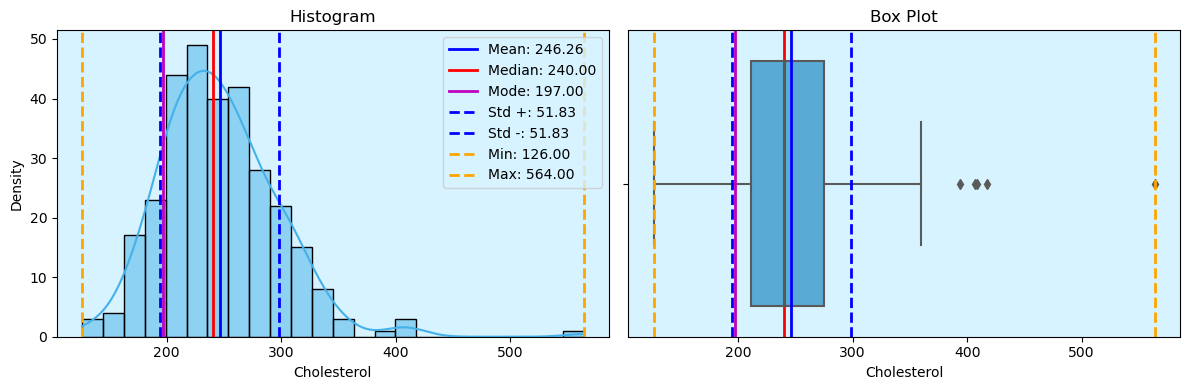

In [34]:
# Cholesterol
box_hist_plot("Cholesterol")

In [35]:
skewness_dist(heart_df_eda, "Cholesterol")

Skewness of the Cholesterol variable: 1.143
The distribution is right-skewed.


In [36]:
ch_outliers, ch_lower_bound, ch_upper_bound = find_outliers(heart_df_eda['Cholesterol'])

print("Lower Bound:", ch_lower_bound)
print("Upper Bound:", ch_upper_bound)
print("Outliers:", len(ch_outliers))

Lower Bound: 115.75
Upper Bound: 369.75
Outliers: 5


In [37]:
outliers.update({"Cholesterol":len(ch_outliers)})

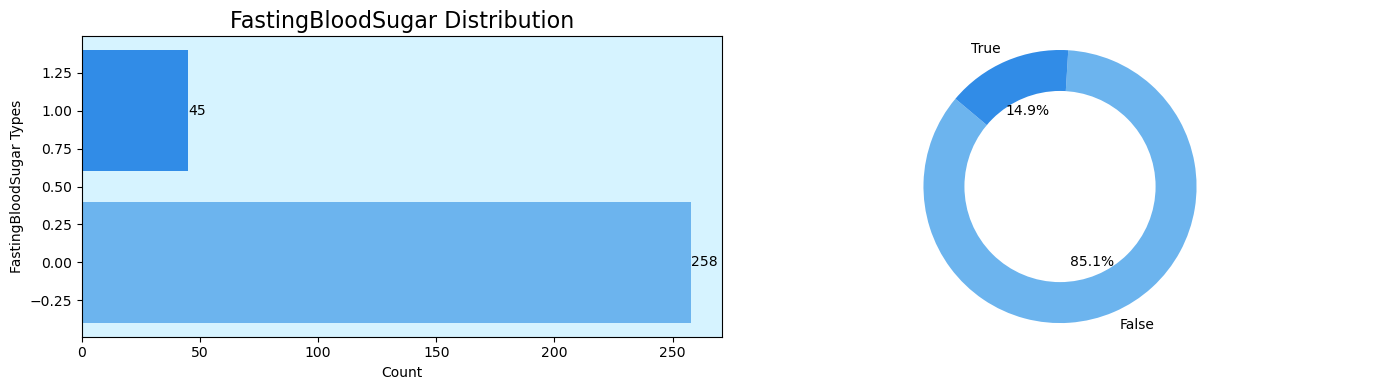

In [38]:
# Fasting Blood Sugar
bar_donut_chart("FastingBloodSugar")

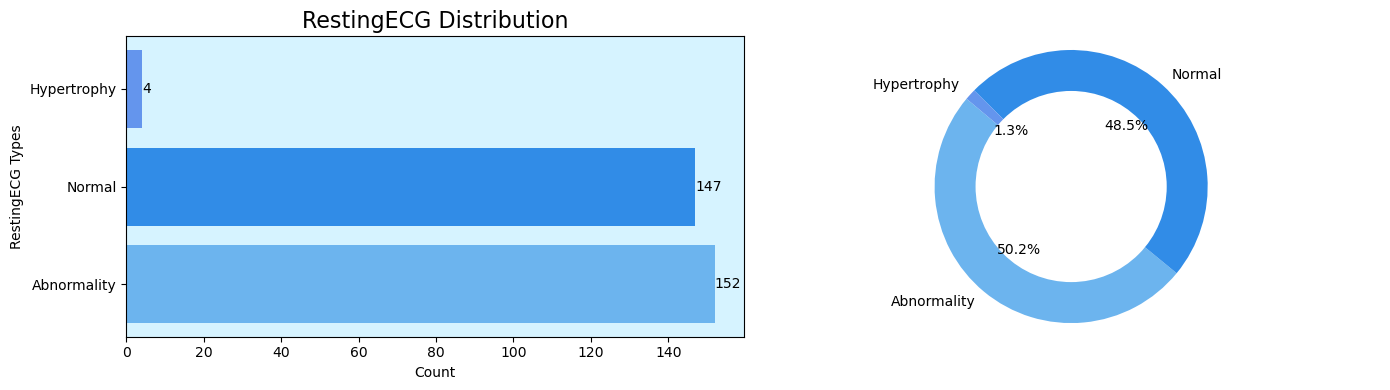

In [39]:
#Resting ECG
bar_donut_chart("RestingECG")

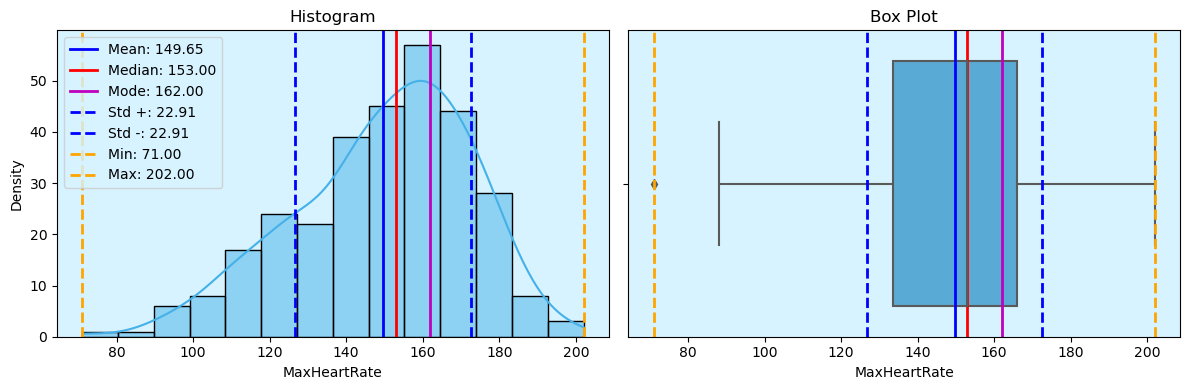

In [40]:
#Max Heart Rate
box_hist_plot("MaxHeartRate")

In [41]:
skewness_dist(heart_df_eda, "MaxHeartRate")

Skewness of the MaxHeartRate variable: -0.537
The distribution is left-skewed.


In [42]:
ecg_outliers, ecg_lower_bound, ecg_upper_bound = find_outliers(heart_df_eda['MaxHeartRate'])

print("Lower Bound:", ecg_lower_bound)
print("Upper Bound:", ecg_upper_bound)
print("Outliers':", len(ecg_outliers))

Lower Bound: 84.75
Upper Bound: 214.75
Outliers': 1


In [43]:
outliers.update({"MaxHeartRate":len(ecg_outliers)})

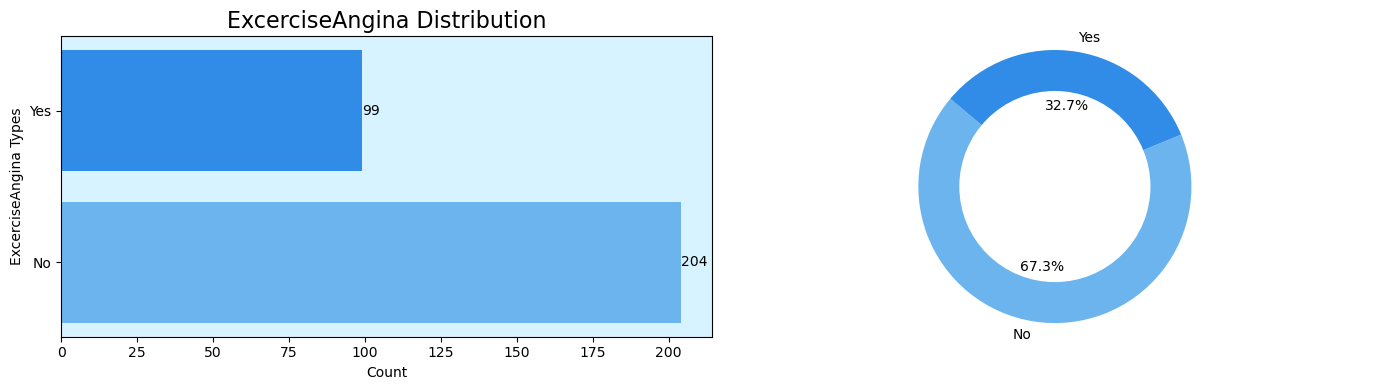

In [44]:
#Excercise Angina
bar_donut_chart("ExcerciseAngina")

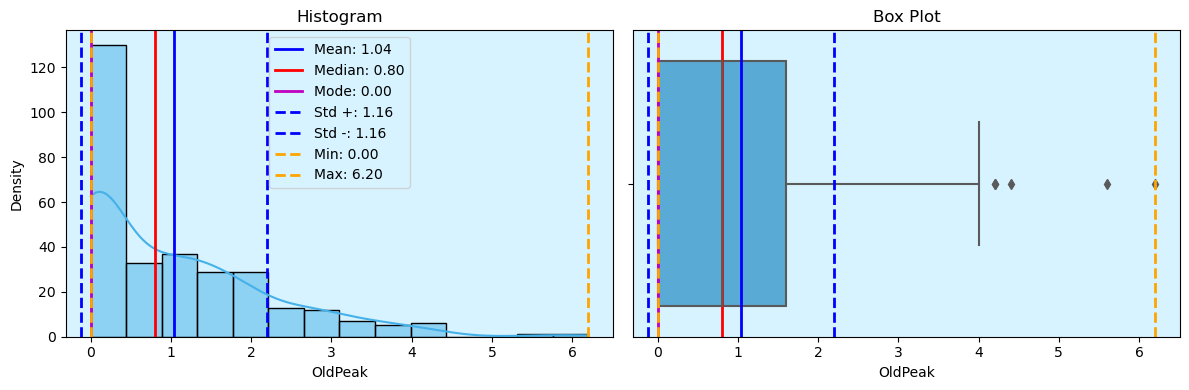

In [45]:
#Old Peak
box_hist_plot("OldPeak")

In [46]:
op_outliers, op_lower_bound, op_upper_bound = find_outliers(heart_df_eda['OldPeak'])

print("Lower Bound:", op_lower_bound)
print("Upper Bound:", op_upper_bound)
print("Outliers':", len(op_outliers))

Lower Bound: -2.4000000000000004
Upper Bound: 4.0
Outliers': 5


In [47]:
outliers.update({"OldPeak":len(op_outliers)})

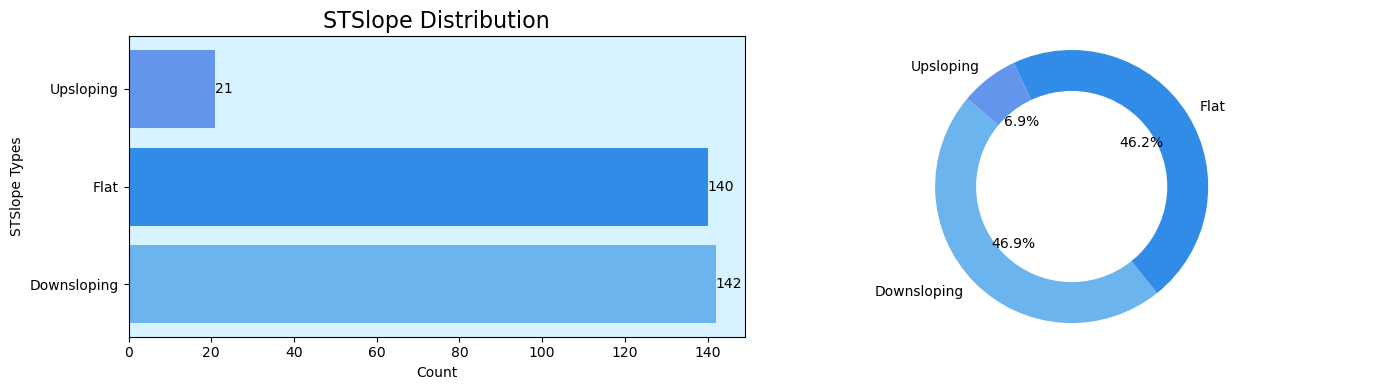

In [48]:
 #STSlope
bar_donut_chart("STSlope")

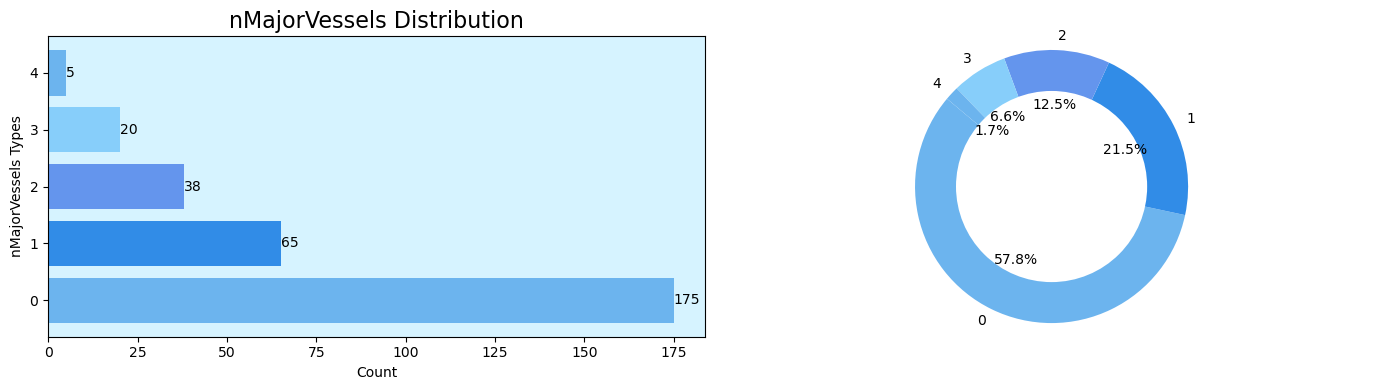

In [49]:
#n Major Vessels
bar_donut_chart("nMajorVessels")

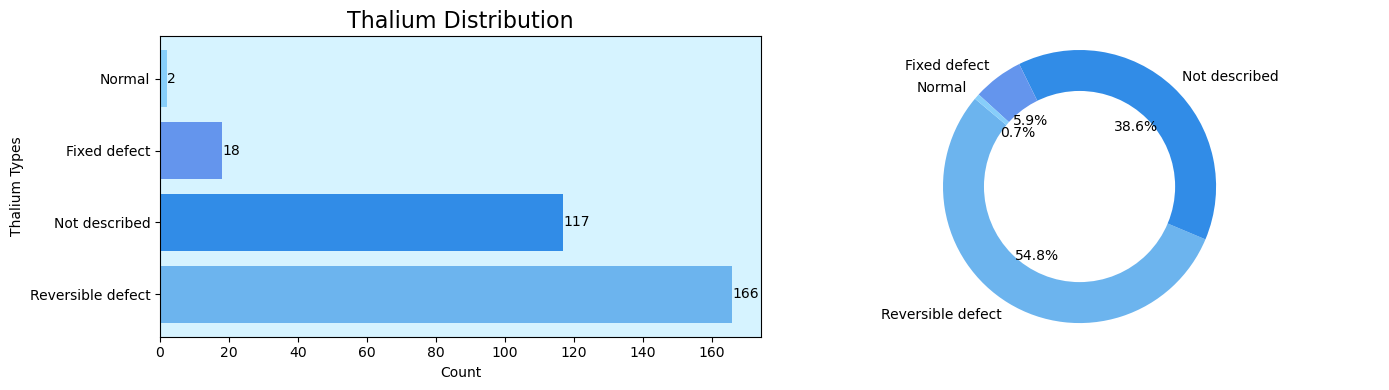

In [50]:
#Thalium
bar_donut_chart("Thalium")

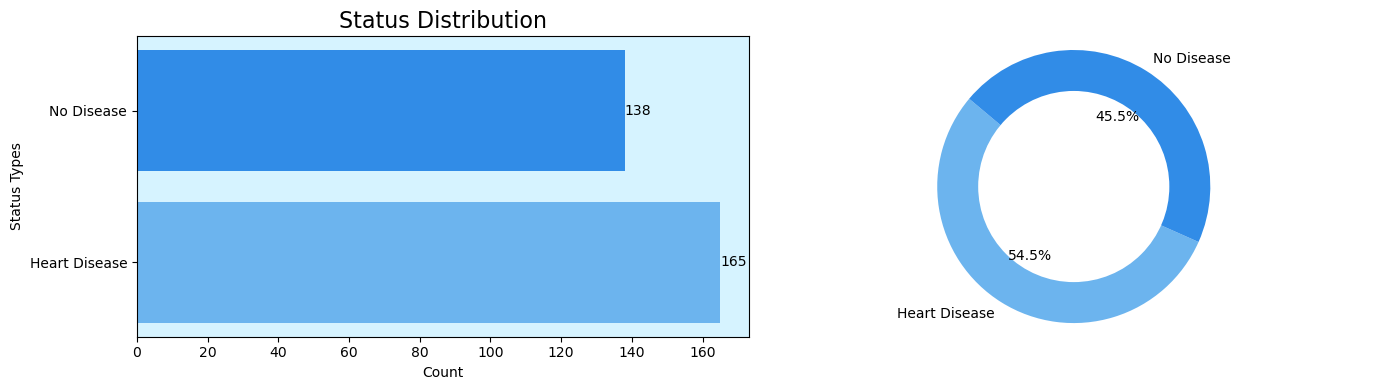

In [51]:
#Status
bar_donut_chart("Status")

### Step 4.2 | Bivariate Analysis 

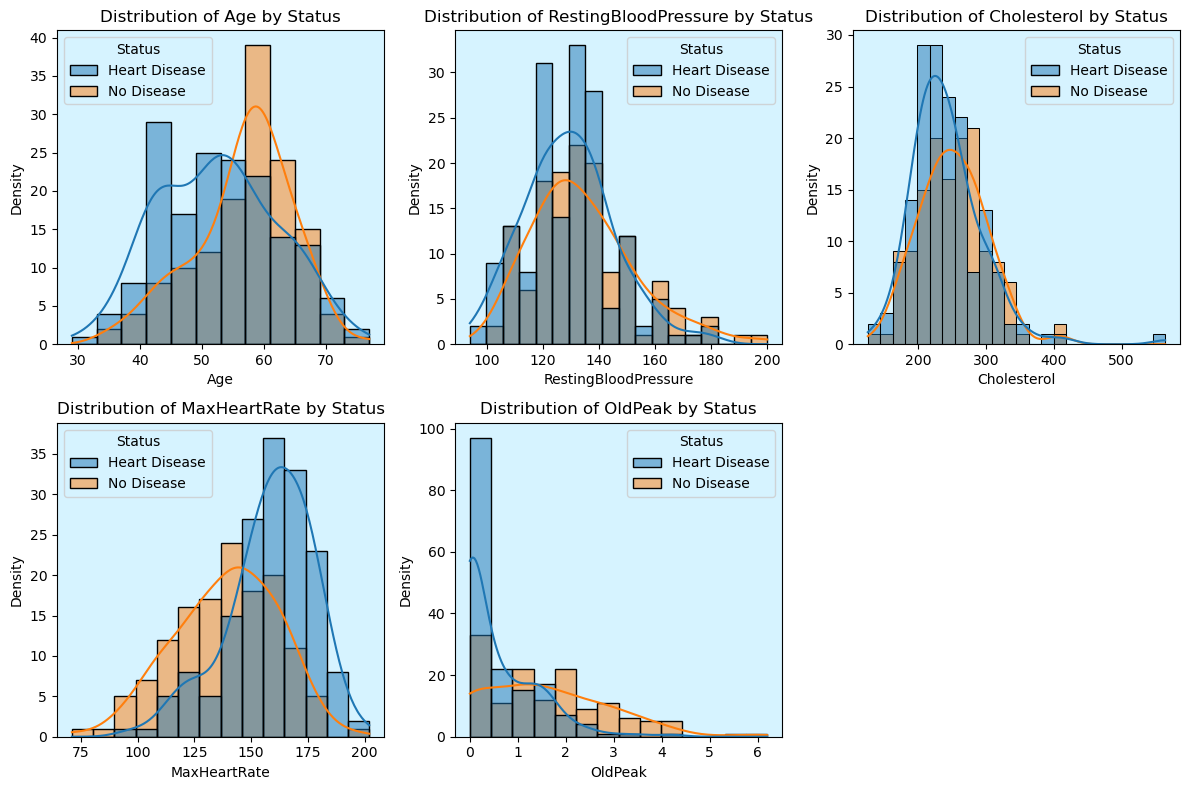

In [52]:
# This code creates a grid of subplots to visualize the distribution of numerical features
numerical_features = ['Age', 'RestingBloodPressure', 'Cholesterol', 'MaxHeartRate', 'OldPeak']

# Create a grid of subplots with 2 rows and 3 columns, and set the figure size
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))

for i, feature in enumerate(numerical_features):
    # Calculate the row and column indices for the current subplot
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    
    # Create a histogram for the current numerical feature, colored by 'Status', with   # Remove the subplot at the bottom right corner (if the number of features is less than the number of subplots)      kernel density estimation
    sns.histplot(data=heart_df_eda, x=feature, hue='Status', kde=True, fill=True, ax=ax)
    ax.set_title(f'Distribution of {feature} by Status')
    ax.set_xlabel(feature)
    ax.set_ylabel('Density')
    
# Remove the subplot at the bottom right corner (if the number of features is less than the number of subplots)
axes[1, 2].remove()

plt.tight_layout()
plt.show()

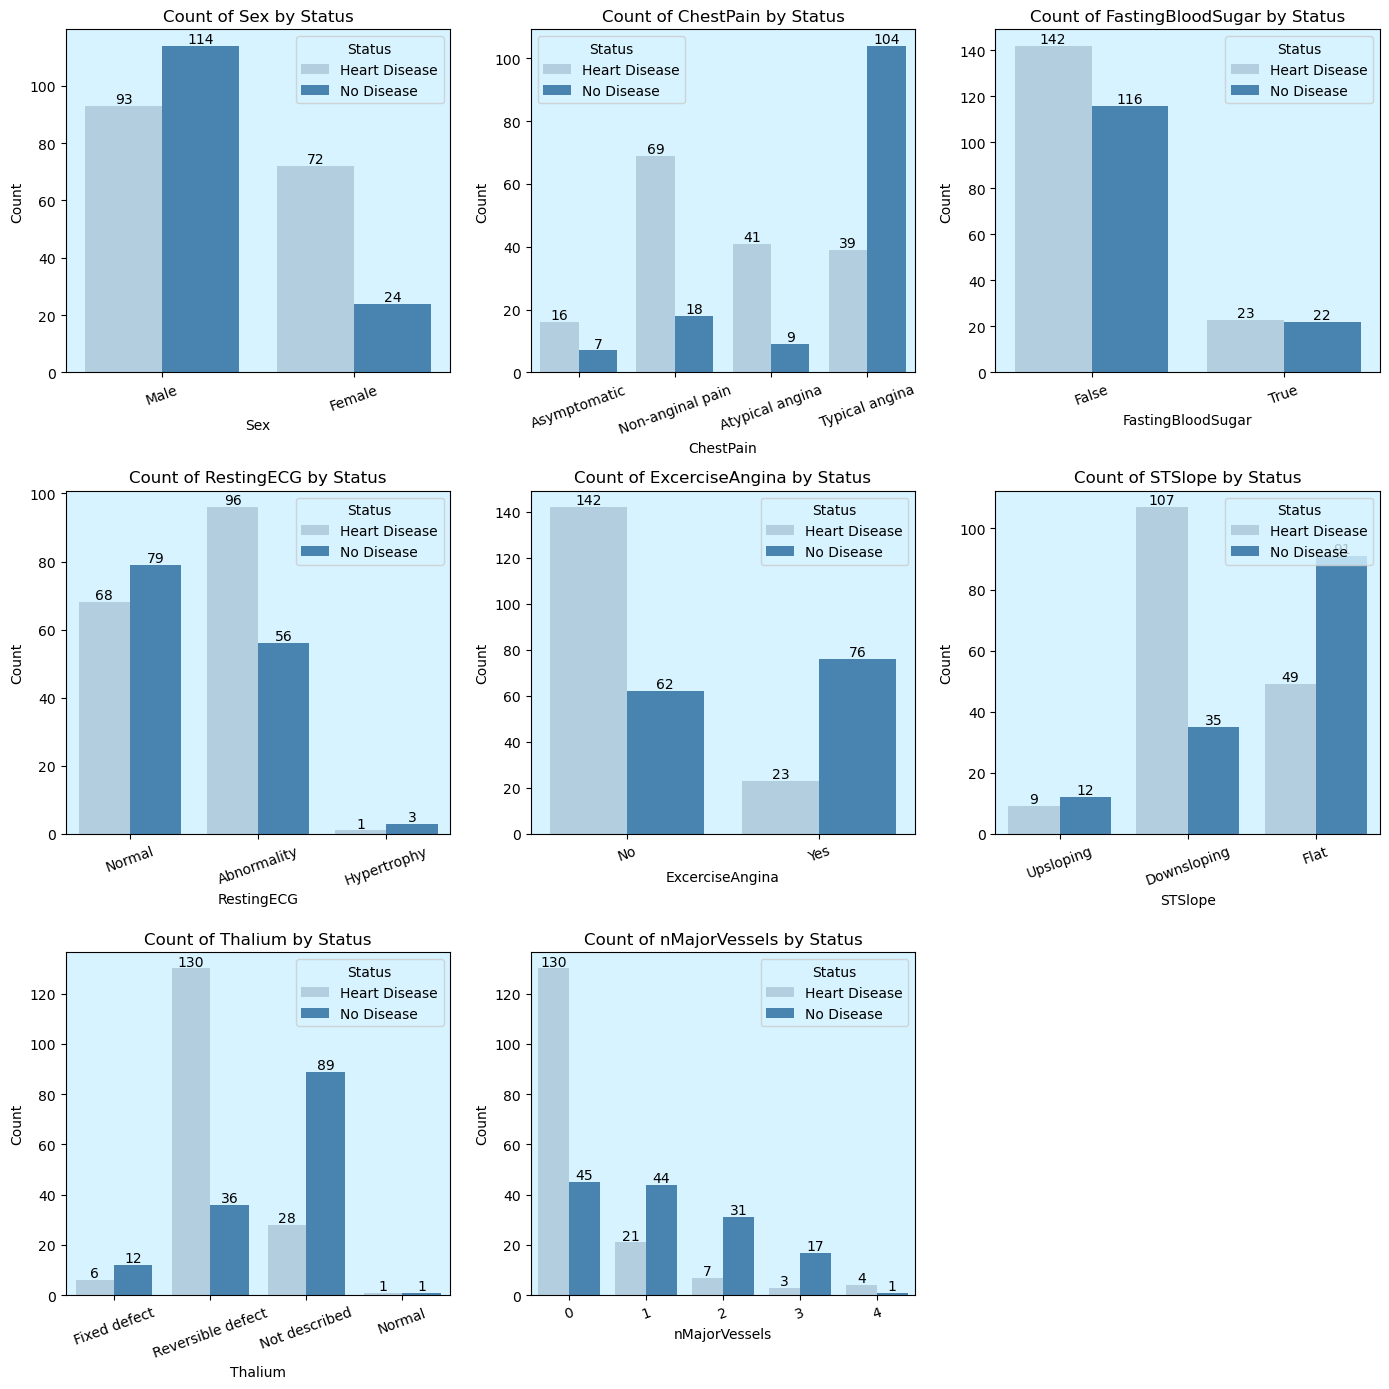

In [53]:
#Binary & Categorical Variables
categorical_features = ['Sex', 'ChestPain', 'FastingBloodSugar', 'RestingECG', 'ExcerciseAngina', 'STSlope', 'Thalium', 'nMajorVessels']

# Calculate the number of features, rows, and columns for the subplot grid
num_features = len(categorical_features)
num_rows = (num_features - 1) // 3 + 1
num_cols = min(num_features, 3)

#Create a figure and a grid of subplots with the calculated number of rows and columns, and set the figure size
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(14, 14))

# Iterate over each categorical feature
for i, feature in enumerate(categorical_features):
    row = i // 3
    col = i % 3
    ax = axes[row, col]

    # Create a count plot for the current categorical feature, colored by 'Status', with       a custom color palette
    sns.countplot(data=heart_df_eda, x=feature, hue='Status', ax=ax, palette='Blues')
    ax.set_title(f'Count of {feature} by Status')
    ax.set_xlabel(feature)
    ax.set_ylabel('Count')
    
    # Rotate x-axis labels for better readability
    ax.tick_params(axis='x', rotation=20)

    # Add count labels on top of each bar
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', 
                    xytext=(0, 5), 
                    textcoords='offset points',
                    color='black')
        
# Remove any empty subplots in the grid (if the number of features is not a multiple of 3)
for i in range(num_rows):
    for j in range(num_cols):
        if i * 3 + j >= num_features:
            fig.delaxes(axes[i, j])

plt.tight_layout()
plt.show()

# Step 5 | Cleaning Data

### Step 5.1 | Handling Outliers 

In [54]:
outliers_df = pd.DataFrame(list(outliers.items()), columns=['Variable', 'Outliers'])
outliers_df


,Variable,Outliers
0,Age,0
1,RestingBloodPressure,9
2,Cholesterol,5
3,MaxHeartRate,1
4,OldPeak,5


In [55]:
# This function performs Box-Cox transformation on specified numerical features in the DataFrame `heart_df`
def box_cox_transform(heart_df):
    
    # Create a copy of the DataFrame to store the transformed data
    transformed_df = heart_df.copy()
    
    # Define the numerical features to transform using Box-Cox
    features_to_transform = ["Age", "RestingBloodPressure", "Cholesterol", "MaxHeartRate", "OldPeak"]

    for feature in features_to_transform:
        # Check if any value in the feature is less than or equal to 0
        if np.any(heart_df[feature] <= 0):
            # If so, add a constant value to make all values positive
            min_value = abs(heart_df[feature].min()) + 1
            heart_df[feature] += min_value
        # Perform Box-Cox transformation on the feature
        transformed_feature, lambda_value = boxcox(heart_df[feature])
        transformed_df[feature] = transformed_feature

    return transformed_df

In [56]:
# This function plots visualizations comparing the original and transformed distributions of a specified variable.
def plot_transform(heart_df, transformed_df, variable):
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 6))

    # Plot a boxplot of the original variable in the top-left subplot
    sns.boxplot(x=heart_df[variable], ax=axes[0, 0], color='#00308F') 
    axes[0, 0].set_title(f"Original {variable}")

    # Plot a boxplot of the transformed variable in the top-right subplot
    sns.boxplot(x=transformed_df[variable], ax=axes[0, 1], color='#7CB9E8') 
    axes[0, 1].set_title(f"Transformed {variable}")

    # Plot a histogram of the original variable in the bottom-left subplot
    sns.histplot(heart_df[variable], ax=axes[1, 0], kde=True, color='#00308F')  
    axes[1, 0].set_title(f"Original {variable} Distribution")

    # Plot a histogram of the transformed variable in the bottom-right subplot
    sns.histplot(transformed_df[variable], ax=axes[1, 1], kde=True, color='#7CB9E8') 
    axes[1, 1].set_title(f"Transformed {variable} Distribution")

    plt.tight_layout()
    plt.show()

In [57]:
transformed_df = box_cox_transform(heart_df)

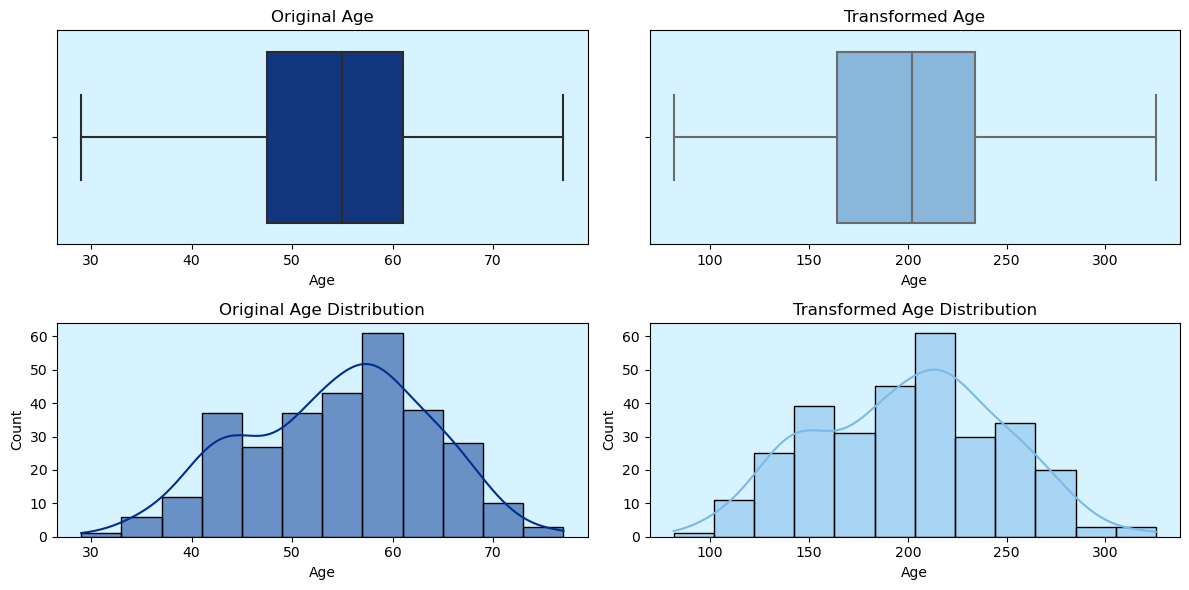

In [58]:
# Age variable 
plot_transform(heart_df, transformed_df, 'Age')

In [59]:
skewness_dist(heart_df_eda, "Age")

Skewness of the Age variable: -0.202
The distribution is left-skewed.


In [60]:
skewness_dist(transformed_df, "Age")

Skewness of the Age variable: -0.053
The distribution is left-skewed.


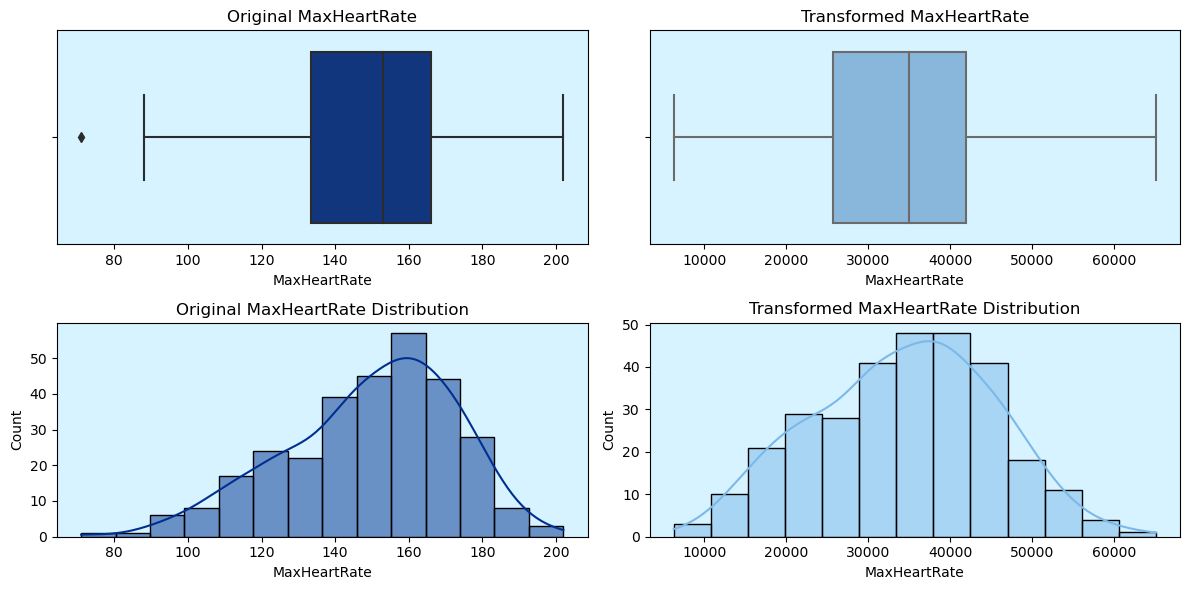

In [61]:
#Max Heart Rate variable
plot_transform(heart_df, transformed_df, 'MaxHeartRate')

In [62]:
skewness_dist(heart_df_eda, "MaxHeartRate")

Skewness of the MaxHeartRate variable: -0.537
The distribution is left-skewed.


In [63]:
skewness_dist(transformed_df, "MaxHeartRate")

Skewness of the MaxHeartRate variable: -0.075
The distribution is left-skewed.


In [64]:
outliers_df["Variable"][3], outliers_df["Outliers"][3]

('MaxHeartRate', 1)

In [65]:
ecg_outliers_bc, ecg_lower_bound_bc, ecg_upper_bound_bc = find_outliers(transformed_df['MaxHeartRate'])

print("Lower Bound:", ecg_lower_bound_bc)
print("Upper Bound:", ecg_upper_bound_bc)
print("Outliers':", len(ecg_outliers_bc))

Lower Bound: 1449.5813416479687
Upper Bound: 66261.20163216196
Outliers': 0


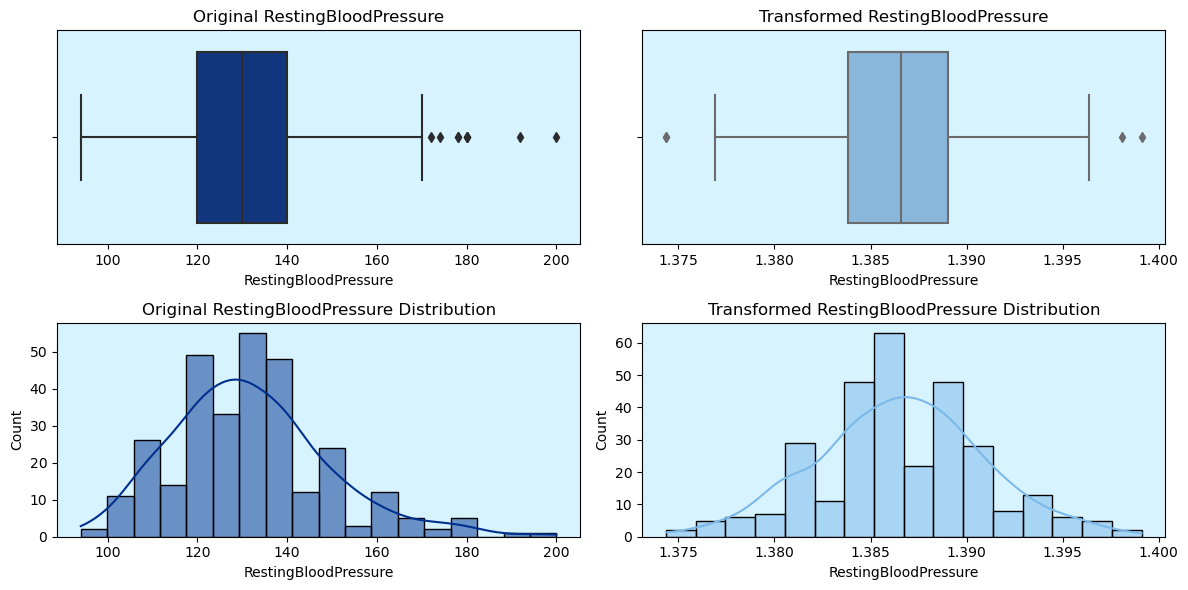

In [66]:
 #Resting Blood Pressure variable 
plot_transform(heart_df, transformed_df, 'RestingBloodPressure')

In [67]:
skewness_dist(heart_df_eda, "RestingBloodPressure")

Skewness of the RestingBloodPressure variable: 0.714
The distribution is right-skewed.


In [68]:
skewness_dist(transformed_df, "RestingBloodPressure")

Skewness of the RestingBloodPressure variable: -0.001
The distribution is left-skewed.


In [69]:
outliers_df["Variable"][1], outliers_df["Outliers"][1]

('RestingBloodPressure', 9)

In [70]:
rbp_outliers_bc, rbp_lower_bound_bc, rbp_upper_bound_bc = find_outliers(transformed_df['RestingBloodPressure'])

print("Lower Bound:", rbp_lower_bound_bc)
print("Upper Bound:", rbp_upper_bound_bc)
print("Outliers:", len(rbp_outliers_bc))

Lower Bound: 1.3760249306944374
Upper Bound: 1.3968131245105593
Outliers: 4


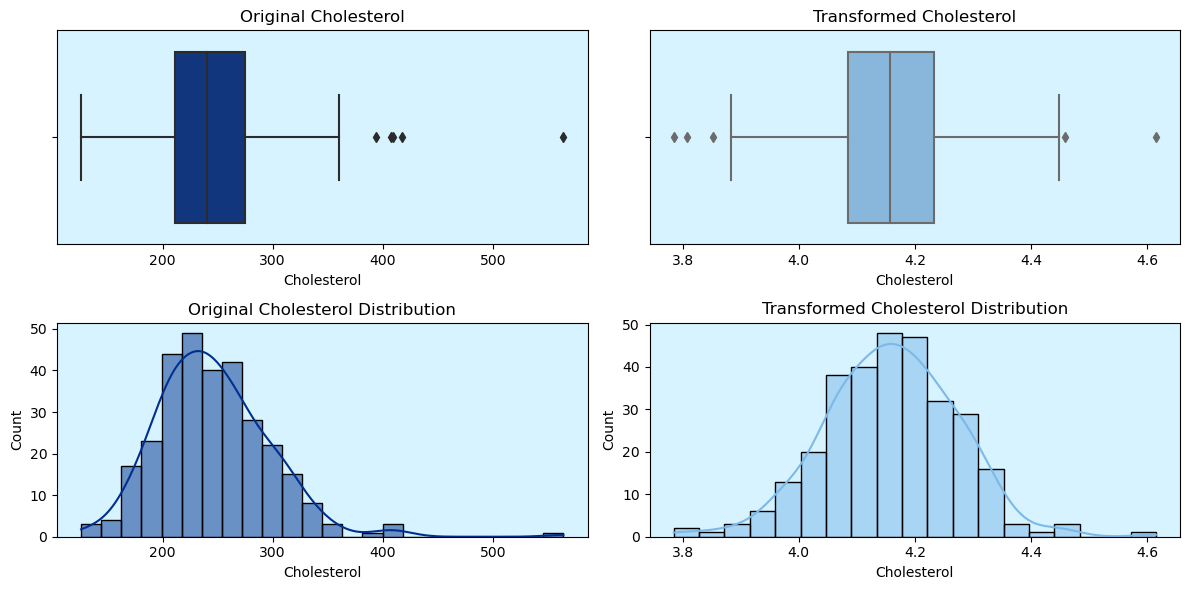

In [71]:
#Cholesterol variable 
plot_transform(heart_df, transformed_df, 'Cholesterol')

In [72]:
transformed_df = box_cox_transform(heart_df)

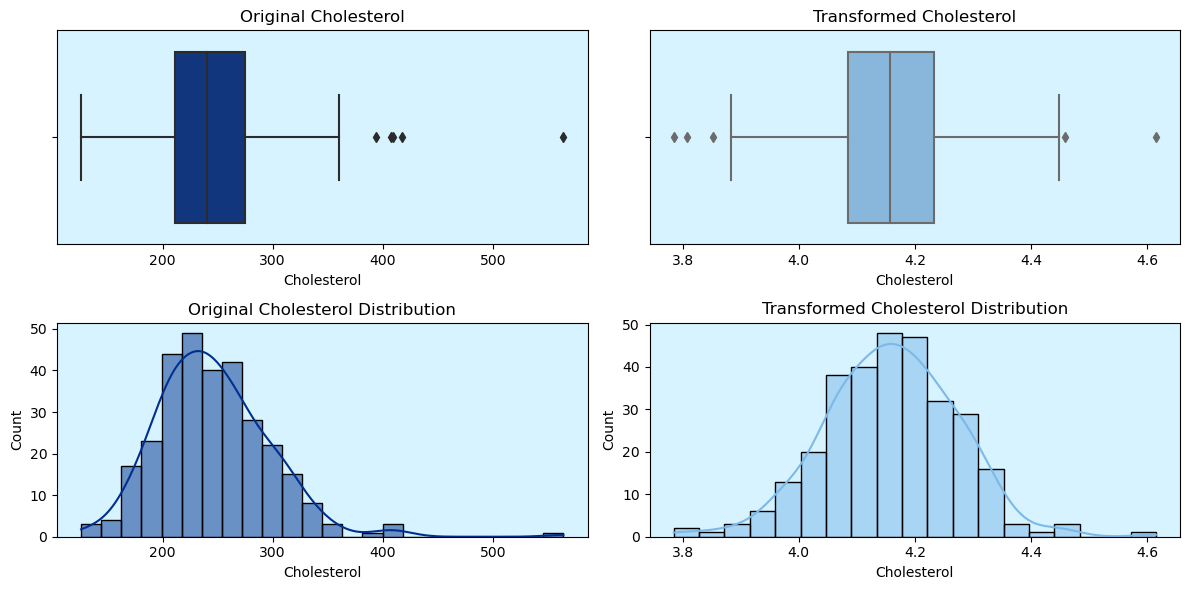

In [73]:
plot_transform(heart_df, transformed_df, 'Cholesterol')

In [74]:
skewness_dist(heart_df_eda, "Cholesterol")

Skewness of the Cholesterol variable: 1.143
The distribution is right-skewed.


In [75]:
skewness_dist(transformed_df, "Cholesterol")

Skewness of the Cholesterol variable: -0.006
The distribution is left-skewed.


In [76]:
ch_outliers_bc, ch_lower_bound_bc, ch_upper_bound_bc = find_outliers(transformed_df['Cholesterol'])

print("Lower Bound:", ch_lower_bound_bc)
print("Upper Bound:", ch_upper_bound_bc)
print("Outliers:", len(ch_outliers_bc))

Lower Bound: 3.864332295042104
Upper Bound: 4.453078106789231
Outliers: 5


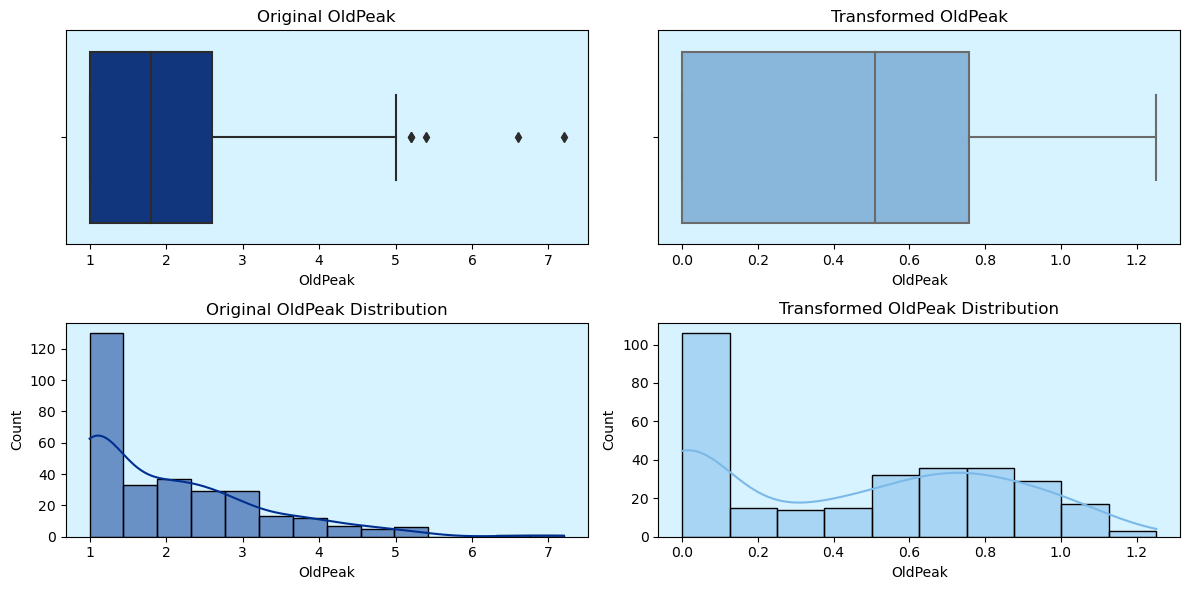

In [77]:
# Old Peak variable 
plot_transform(heart_df, transformed_df, 'OldPeak')

In [78]:
skewness_dist(heart_df_eda, "OldPeak")
skewness_dist(transformed_df, "OldPeak")

Skewness of the OldPeak variable: 1.270
The distribution is right-skewed.
Skewness of the OldPeak variable: 0.124
The distribution is right-skewed.


In [79]:
op_outliers_bc, op_lower_bound_bc, op_upper_bound_bc = find_outliers(transformed_df['OldPeak'])

print("Lower Bound:", op_lower_bound_bc)
print("Upper Bound:", op_upper_bound_bc)
print("Outliers':", len(op_outliers_bc))

Lower Bound: -1.1382439503934751
Upper Bound: 1.897073250655792
Outliers': 0


In [80]:
transformed = transformed_df.copy()

In [81]:
heart_df_copy = heart_df.copy()

###  Step 5.2 | Missing Values

In [82]:
heart_df.isnull().sum()

Age                     0
Sex                     0
ChestPain               0
RestingBloodPressure    0
Cholesterol             0
FastingBloodSugar       0
RestingECG              0
MaxHeartRate            0
ExcerciseAngina         0
OldPeak                 0
STSlope                 0
nMajorVessels           0
Thalium                 0
Status                  0
dtype: int64

### Step 5.3 | Duplicated Values

In [83]:
# Identify duplicated rows in the DataFrame `heart_df`
duplicated_rows = heart_df.duplicated()

# Filter the DataFrame `heart_df` to show only duplicated rows
# 'heart_df[duplicated_rows]` selects rows where `duplicated_rows` is True, indicating duplicates
heart_df[duplicated_rows]


,Age,Sex,ChestPain,RestingBloodPressure,Cholesterol,FastingBloodSugar,RestingECG,MaxHeartRate,ExcerciseAngina,OldPeak,STSlope,nMajorVessels,Thalium,Status
164,38,Male,Non-anginal pain,138,175,False,Abnormality,173,No,1.0,Downsloping,4,Reversible defect,Heart Disease


In [84]:
heart_df.drop(index=164, axis=0, inplace=True)

In [85]:
transformed.drop(index=164, axis=0, inplace=True)

#  Step 6 | Feature Engineering



###  Step 6.1 | One-Hot Encoding



In [86]:
# List of categorical features to be encoded using one-hot encoding or other encoding techniques
features_to_encode = ["ChestPain", "RestingECG", "STSlope", "Thalium"]

In [87]:
heart_df = pd.get_dummies(heart_df, columns=features_to_encode)

In [88]:
transformed = pd.get_dummies(transformed, columns=features_to_encode)

In [89]:
# Identify columns with boolean (bool) data type in the DataFrame `transformed`
bool_columns = transformed.select_dtypes(include=bool).columns

# Convert boolean columns to integer (int64) data type in the DataFrame `transformed`
# `transformed[bool_columns]` selects the boolean columns, and `.astype("int64")` converts them to integer type
transformed[bool_columns] = transformed[bool_columns].astype("int64")


In [90]:
bool_columns2 = heart_df.select_dtypes(include=bool).columns
heart_df[bool_columns2] = heart_df[bool_columns2].astype("int64")

###  Step 6.2 | Label Encoding 

In [91]:
label_encoder = LabelEncoder()

In [92]:
# Define the list of features to encode
features_to_encode = ['Sex', 'FastingBloodSugar', 'ExcerciseAngina', 'Status']


In [93]:
# Encode categorical features in the 'transformed' DataFrame
for feature in features_to_encode:
    transformed[feature] = label_encoder.fit_transform(transformed[feature])

In [94]:
# Encode categorical features in the 'heart_df' DataFrame
for feature in features_to_encode:
    heart_df[feature] = label_encoder.fit_transform(heart_df[feature])

In [95]:
transformed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 302 entries, 0 to 302
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         302 non-null    float64
 1   Sex                         302 non-null    int32  
 2   RestingBloodPressure        302 non-null    float64
 3   Cholesterol                 302 non-null    float64
 4   FastingBloodSugar           302 non-null    int32  
 5   MaxHeartRate                302 non-null    float64
 6   ExcerciseAngina             302 non-null    int32  
 7   OldPeak                     302 non-null    float64
 8   nMajorVessels               302 non-null    int64  
 9   Status                      302 non-null    int32  
 10  ChestPain_Asymptomatic      302 non-null    int64  
 11  ChestPain_Atypical angina   302 non-null    int64  
 12  ChestPain_Non-anginal pain  302 non-null    int64  
 13  ChestPain_Typical angina    302 non-null

# Step 7 | Correlation Analysis



In [96]:
df_corr = heart_df.copy()

In [97]:
heart_df2= heart_df.copy()

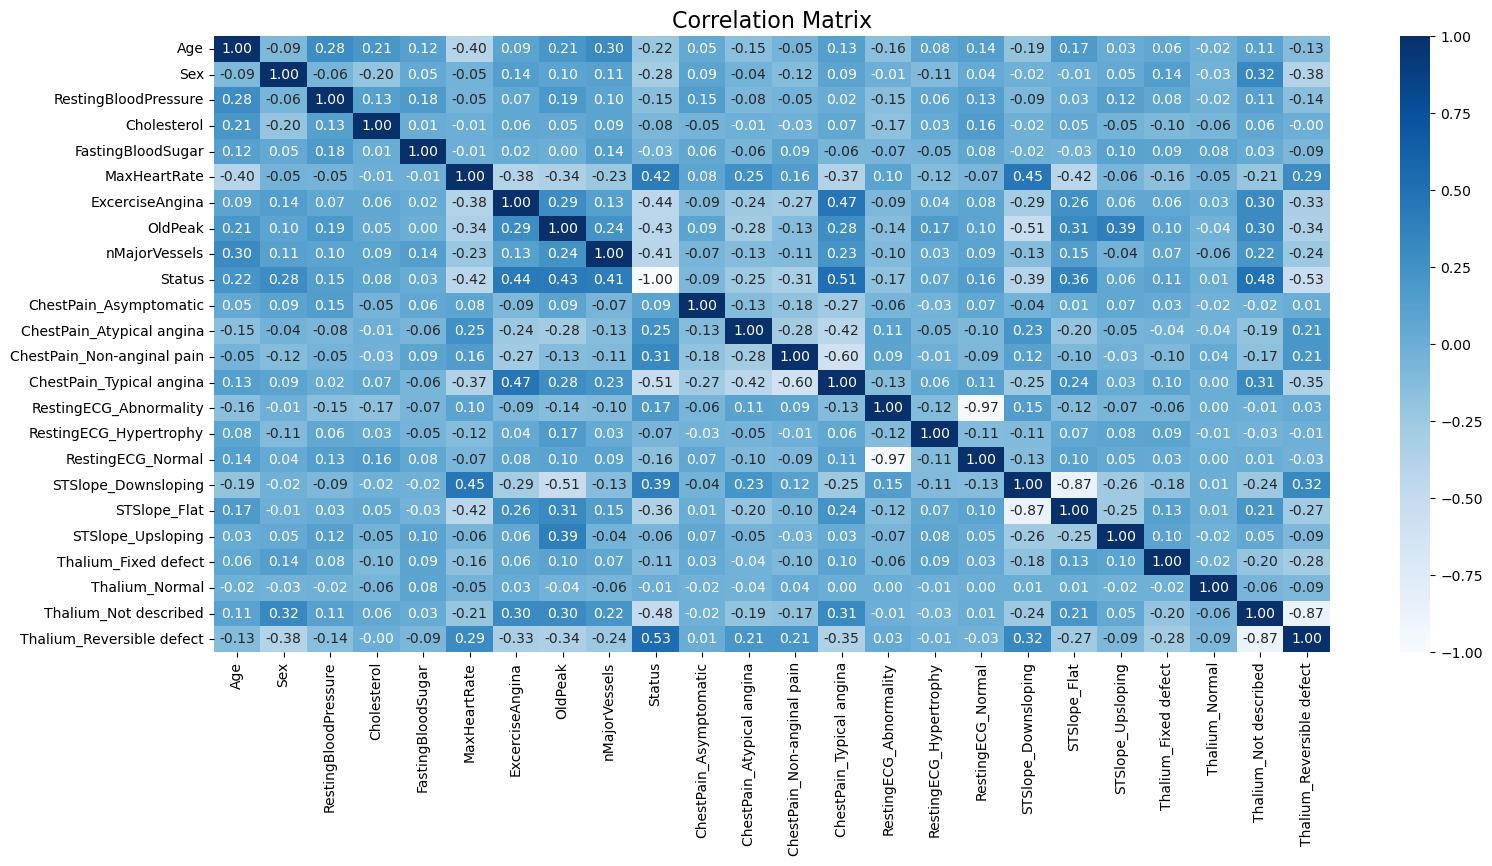

In [98]:
df_correlation = df_corr.corr()

# Create a copy of the correlation matrix
df_corr_reversed = df_correlation.copy()

# Reverse the sign of correlation values for the 'Status' variable
df_corr_reversed['Status'] *= -1

plt.figure(figsize=(18, 8))
heatmap = sns.heatmap(df_corr_reversed, annot=True, cmap='Blues', fmt=".2f")
plt.title('Correlation Matrix', fontsize=16)
plt.show()

In [99]:
heart_df2.drop(["ChestPain_Asymptomatic", "RestingECG_Hypertrophy", "STSlope_Upsloping", "Thalium_Normal"], axis=1, inplace=True)

In [100]:
transformed.drop(["ChestPain_Asymptomatic", "RestingECG_Hypertrophy", "STSlope_Upsloping", "Thalium_Normal"], axis=1, inplace=True)

In [101]:
df3_no_transformed = heart_df2.copy()

In [102]:
heart_df3 = transformed.copy()

In [103]:
heart_df3 

,Age,Sex,RestingBloodPressure,Cholesterol,FastingBloodSugar,MaxHeartRate,ExcerciseAngina,OldPeak,nMajorVessels,Status,ChestPain_Atypical angina,ChestPain_Non-anginal pain,ChestPain_Typical angina,RestingECG_Abnormality,RestingECG_Normal,STSlope_Downsloping,STSlope_Flat,Thalium_Fixed defect,Thalium_Not described,Thalium_Reversible defect
0,245.026003,1,1.390125,4.141081,1,33435.178719,0,0.897845,0,0,0,0,0,0,1,0,0,1,0,0
1,115.210734,1,1.386589,4.180465,0,54788.235951,0,1.055476,0,0,0,1,0,1,0,0,0,0,0,1
2,133.288287,0,1.386589,4.065939,0,45430.223348,0,0.708296,0,0,1,0,0,0,1,1,0,0,0,1
3,207.381618,1,1.383821,4.148257,0,49057.156271,0,0.508937,0,0,1,0,0,1,0,1,0,0,0,1
4,212.646759,0,1.383821,4.370746,0,40277.331099,1,0.418628,0,0,0,0,1,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,212.646759,0,1.389018,4.159997,0,21435.956407,1,0.174220,0,1,0,0,1,1,0,0,1,0,1,0
299,152.107773,1,1.380631,4.210738,0,25109.759124,0,0.651009,0,1,0,0,0,1,0,0,1,0,1,0
300,273.002120,1,1.389908,4.034289,1,29107.774522,0,1.044861,2,1,0,0,1,1,0,0,1,0,1,0
301,212.646759,1,1.386589,3.807768,0,18438.131804,1,0.651009,1,1,0,0,1,1,0,0,1,0,1,0


We observe varying degrees of correlation, ranging from weak to moderate, among different columns. The most significant negative correlation among our features is identified between 'STSLope_Downsloping' and 'OldPeak'. Let's represent this relationship visually using a scatterplot.



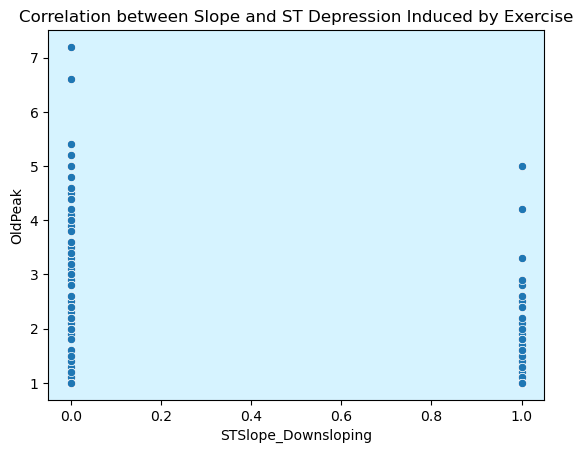

In [104]:
sns.scatterplot(x='STSlope_Downsloping', y='OldPeak', data=heart_df)
plt.title('Correlation between Slope and ST Depression Induced by Exercise')
plt.show()

**The negative correlation between 'slope' and 'oldpeak' can be elucidated by their roles in exercise stress testing within the realm of cardiac health assessment.**

In the context of evaluating heart health, 'slope' typically refers to the inclination of the ST segment on an electrocardiogram \(ECG\) during exercise stress testing. A positive slope denotes an upward \(positive\) deflection of the ST segment, indicating a favorable prognosis and suggesting lesser myocardial ischemia.

Conversely, 'oldpeak' \(ST depression induced by exercise\) quantifies the extent of ST segment depression during exercise stress testing. ST depression serves as an indicator of myocardial ischemia, signifying inadequate blood flow to the heart muscle during physical exertion.

Therefore, in individuals with good cardiac health, a positive 'slope' is typically associated with lower 'oldpeak' values, as the heart can manage increased workload without experiencing ischemia.



### Next, we'll calculate and visually represent the correlation coefficients between each feature variable and the target variable 'output'.


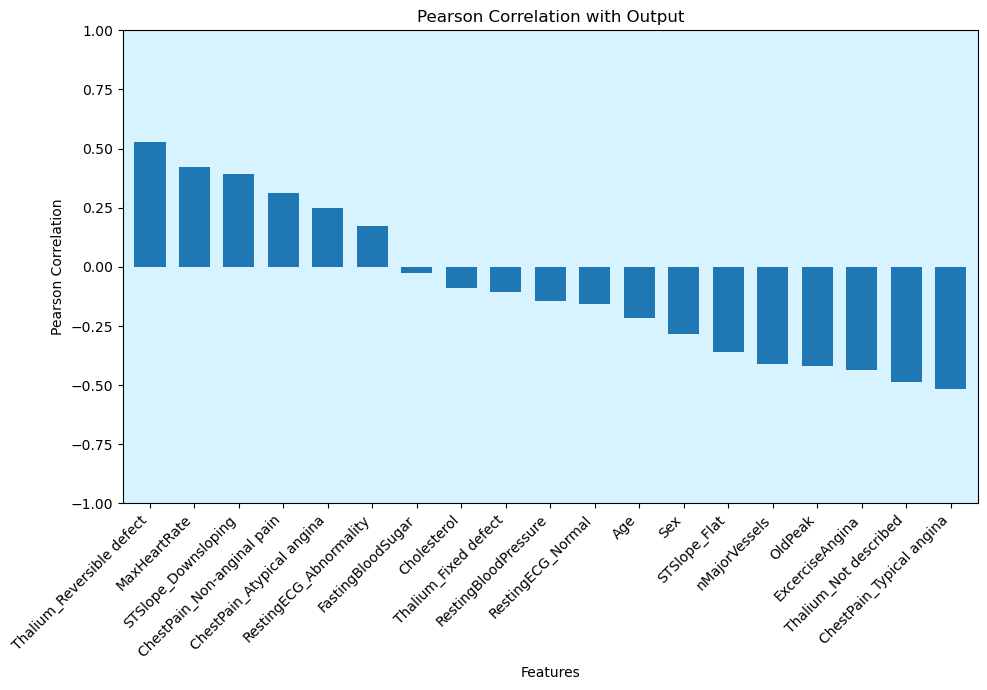

In [105]:
# Compute Pearson correlation coefficients
numeric_df = heart_df3.select_dtypes(include='number')
correlations = numeric_df.corr()['Status'].drop('Status').sort_values()

# Reverse the sign of correlation values
correlations *= -1

# Plotting
plt.figure(figsize=(10, 7))
ax = correlations.plot(kind='bar', width=0.7)
ax.set(ylim=[-1, 1], ylabel='Pearson Correlation', xlabel='Features', 
       title='Pearson Correlation with Output')
ax.set_xticklabels(correlations.index, rotation=45, ha='right')
plt.tight_layout()
plt.show()

In this analysis, it's evident that Max Heart Rate, STSlope, and Chest Pain exhibit positive correlations with the occurrence of a heart attack. Conversely, Exercise\-induced angina, OldPeak, and the number of major vessels show negative correlations with our output variable.

Thallium reversible defect: During exercise, the heart requires increased oxygen supply due to heightened demand. However, if there are obstructions or blockages in the coronary arteries, which supply oxygen\-rich blood to the heart muscle, the increased demand may not be met adequately, leading to ischemia \(insufficient blood flow\) in those regions. This ischemia can manifest as reversible defects in the thallium MPI scan, reflecting areas of the heart muscle where blood flow is compromised during exercise but may recover at rest.



# Step 8 | Feature Scaling


In [106]:
# List of numerical features to be scaled using StandardScaler
features_to_scale = ['Age', 'RestingBloodPressure', 'Cholesterol', 'MaxHeartRate', 'OldPeak', 'nMajorVessels']

# Create an instance of StandardScaler from scikit-learn
scaler = StandardScaler()

# Fit the scaler on the specified numerical features in the DataFrame `transformed`
scaler.fit(transformed[features_to_scale])

# Transform (standardize) the specified numerical features using the fitted scaler
transformed_scaled = scaler.transform(transformed[features_to_scale])

# Replace the original numerical features in `transformed` with the scaled (transformed) features
transformed[features_to_scale] = transformed_scaled


In [107]:
transformed[features_to_scale] = scaler.fit_transform(transformed[features_to_scale])

In [108]:
heart_df2[features_to_scale] = scaler.fit_transform(heart_df[features_to_scale])

 # Step 9 | Machine Learning Techniques



In [109]:
def customize_split(heart_df):
    # Shuffle the DataFrame `heart_df` to randomize the order of samples
    df_shuffled = heart_df.sample(frac=1, random_state=42)

    # Define train and test set proportions
    train_size = 0.7
    test_size = 0.3

    # Calculate the number of samples for train and test sets
    num_samples = len(df_shuffled)
    num_samples_train = int(num_samples * train_size)
    num_samples_test = num_samples - num_samples_train

    # Create the training DataFrame by selecting the first `num_samples_train` samples
    train_df = df_shuffled.head(num_samples_train)

    # Calculate the number of samples per class for the test set
    num_samples_per_class_test = int(num_samples_test / 2)

    # Select samples for the test set by balancing the classes (Status 0 and Status 1)
    test_df = pd.concat([
        df_shuffled[df_shuffled['Status'] == 0].tail(num_samples_per_class_test),
        df_shuffled[df_shuffled['Status'] == 1].tail(num_samples_per_class_test)
    ])

    # Separate features (X) and target variable (y) for the training set
    X_train = train_df.drop(columns=['Status'])
    y_train = train_df['Status'].values

    # Separate features (X) and target variable (y) for the test set
    X_test = test_df.drop(columns=['Status'])
    y_test = test_df['Status'].values

    # Display the class distribution in the test set
    print(test_df['Status'].value_counts())

    # Calculate the percentage of samples in the training and test sets relative to the entire dataset
    percent_train = (len(train_df) / len(df_shuffled)) * 100
    percent_test = (len(test_df) / len(df_shuffled)) * 100
    
    # Return the split data along with the percentage split information
    return X_train, X_test, y_train, y_test, percent_train, percent_test


In [110]:
df2_X_train, df2_X_test, df2_y_train, df2_y_test, ptrain_df2, ptest_df2 = customize_split(heart_df2)
transformed_X_train, transformed_X_test, transformed_y_train, transformed_y_test, ptrain_df2, ptest_df2 = customize_split(transformed)

Status
0    45
1    45
Name: count, dtype: int64
Status
0    45
1    45
Name: count, dtype: int64


In [111]:
print(f"Percentage of samples for training: {ptrain_df2:.2f}%")
print(f"Percentage of samples for testing: {ptest_df2:.2f}%")

Percentage of samples for training: 69.87%
Percentage of samples for testing: 29.80%


In [112]:
(pd.DataFrame(df2_y_train)).value_counts()

0    114
1     97
Name: count, dtype: int64

In [113]:
df3_X_train, df3_X_test, df3_y_train, df3_y_test, ptrain_df3, ptest_df3 = customize_split(heart_df3) 

Status
0    45
1    45
Name: count, dtype: int64


### Logistic Regression

Logistic Regression Confusion Matrix:
[[40  5]
 [11 34]]
Logistic Regression Accuracy: 0.8222222222222222
Logistic Regression Precision: 0.8717948717948718
Logistic Regression Recall: 0.7555555555555555
Logistic Regression F1-score: 0.8095238095238095


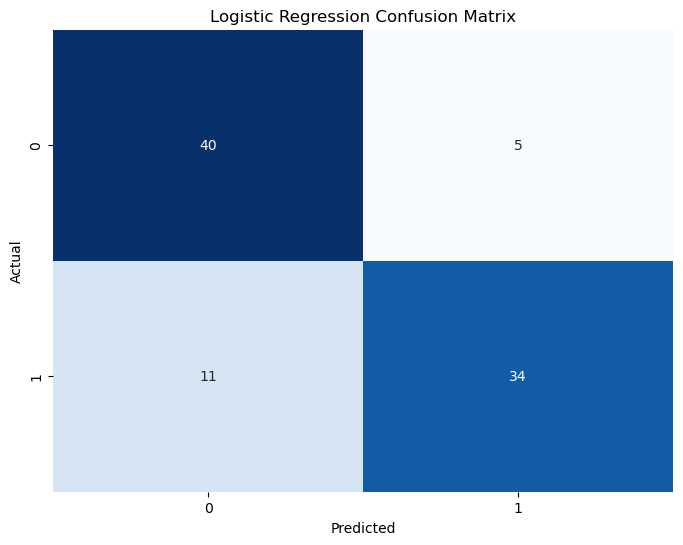

In [114]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Shuffle the DataFrame `heart_df` and set random_state for reproducibilit
df_shuffled = heart_df.sample(frac=1, random_state=42)

train_size = 0.7
test_size = 0.3

# Calculate the number of samples in the shuffled DataFrame
num_samples = len(df_shuffled)

# Calculate the number of samples for training and testing
num_samples_train = int(num_samples * train_size)
num_samples_test = num_samples - num_samples_train

# Create the training DataFrame by selecting the first `num_samples_train` rows
train_df = df_shuffled.head(num_samples_train)

# Calculate the number of samples per class for the test DataFrame
num_samples_per_class_test = int(num_samples_test / 2)

# Create the test DataFrame by selecting the last `num_samples_per_class_test` rows for each class
test_df = pd.concat([df_shuffled[df_shuffled['Status'] == 0].tail(num_samples_per_class_test),
                         df_shuffled[df_shuffled['Status'] == 1].tail(num_samples_per_class_test)])

# Split the features and target variables for training and testing
X_train = train_df.drop(columns=['Status'])
y_train = train_df['Status'].values 

X_test = test_df.drop(columns=['Status'])
y_test = test_df['Status'].values

   


# Initialize the classifier (Logistic Regression)
clf_lr = LogisticRegression(random_state=42)

# Train the classifier
clf_lr.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lr = clf_lr.predict(X_test)

# Generate confusion matrix for Logistic Regression
cm_lr = confusion_matrix(y_test, y_pred_lr)

# Calculate accuracy metrics for Logistic Regression
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)

print("Logistic Regression Confusion Matrix:")
print(cm_lr)
print("Logistic Regression Accuracy:", accuracy_lr)
print("Logistic Regression Precision:", precision_lr)
print("Logistic Regression Recall:", recall_lr)
print("Logistic Regression F1-score:", f1_lr)

# Plot confusion matrix heatmap for Logistic Regression
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


### DecisionTree

Decision Tree Confusion Matrix:
[[33 12]
 [12 33]]
Decision Tree Accuracy: 0.7333333333333333
Decision Tree Precision: 0.7333333333333333
Decision Tree Recall: 0.7333333333333333
Decision Tree F1-score: 0.7333333333333333


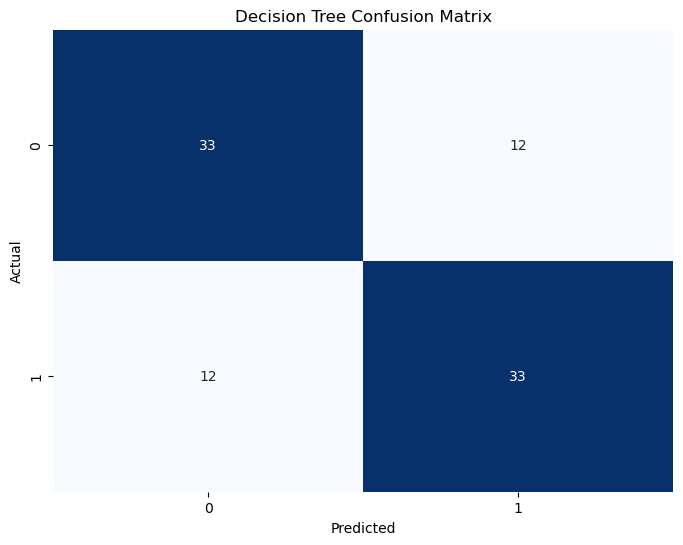

In [115]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree classifier
clf_decisiontree = DecisionTreeClassifier(random_state=42)

# Train the Decision Tree classifier
clf_decisiontree.fit(X_train, y_train)

# Make predictions on the test set using Decision Tree
y_pred_decisiontree = clf_decisiontree.predict(X_test)

# Generate confusion matrix for Decision Tree
cm_decisiontree = confusion_matrix(y_test, y_pred_decisiontree)

# Calculate accuracy metrics for Decision Tree
accuracy_decisiontree = accuracy_score(y_test, y_pred_decisiontree)
precision_decisiontree = precision_score(y_test, y_pred_decisiontree)
recall_decisiontree = recall_score(y_test, y_pred_decisiontree)
f1_decisiontree = f1_score(y_test, y_pred_decisiontree)

print("Decision Tree Confusion Matrix:")
print(cm_decisiontree)
print("Decision Tree Accuracy:", accuracy_decisiontree)
print("Decision Tree Precision:", precision_decisiontree)
print("Decision Tree Recall:", recall_decisiontree)
print("Decision Tree F1-score:", f1_decisiontree)

# Plot confusion matrix heatmap for Decision Tree
plt.figure(figsize=(8, 6))
sns.heatmap(cm_decisiontree, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


### RandomForest

Random Forest Confusion Matrix:
[[37  8]
 [11 34]]
Random Forest Accuracy: 0.7888888888888889
Random Forest Precision: 0.8095238095238095
Random Forest Recall: 0.7555555555555555
Random Forest F1-score: 0.7816091954022989


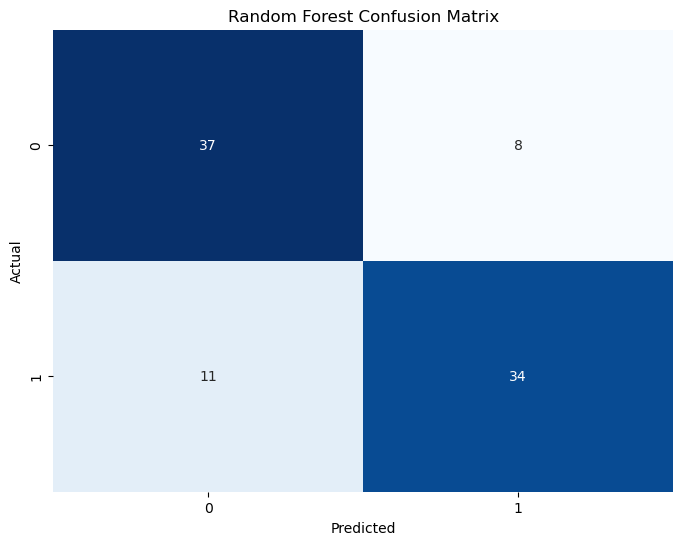

In [116]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the classifier (Random Forest Classifier)
clf_rf = RandomForestClassifier(random_state=42)

# Train the classifier
clf_rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = clf_rf.predict(X_test)

# Generate confusion matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Calculate accuracy metrics for Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

print("Random Forest Confusion Matrix:")
print(cm_rf)
print("Random Forest Accuracy:", accuracy_rf)
print("Random Forest Precision:", precision_rf)
print("Random Forest Recall:", recall_rf)
print("Random Forest F1-score:", f1_rf)

# Plot confusion matrix heatmap for Random Forest
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


### SVM  with RBF kernel

SVM with RBF Kernel Confusion Matrix:
[[36  9]
 [25 20]]
SVM with RBF Kernel Accuracy: 0.6222222222222222
SVM with RBF Kernel Precision: 0.6896551724137931
SVM with RBF Kernel Recall: 0.4444444444444444
SVM with RBF Kernel F1-score: 0.5405405405405405


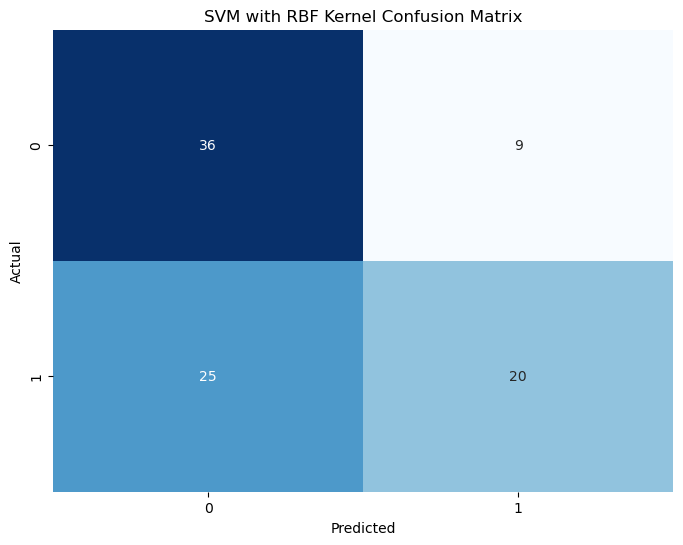

In [117]:
from sklearn.svm import SVC

# Initialize the SVM classifier with RBF kernel
clf_svm_rbf = SVC(kernel='rbf', random_state=42)

# Train the classifier
clf_svm_rbf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svm_rbf = clf_svm_rbf.predict(X_test)

# Generate confusion matrix for SVM with RBF kernel
cm_svm_rbf = confusion_matrix(y_test, y_pred_svm_rbf)

# Calculate accuracy metrics for SVM with RBF kernel
accuracy_svm_rbf = accuracy_score(y_test, y_pred_svm_rbf)
precision_svm_rbf = precision_score(y_test, y_pred_svm_rbf)
recall_svm_rbf = recall_score(y_test, y_pred_svm_rbf)
f1_svm_rbf = f1_score(y_test, y_pred_svm_rbf)

print("SVM with RBF Kernel Confusion Matrix:")
print(cm_svm_rbf)
print("SVM with RBF Kernel Accuracy:", accuracy_svm_rbf)
print("SVM with RBF Kernel Precision:", precision_svm_rbf)
print("SVM with RBF Kernel Recall:", recall_svm_rbf)
print("SVM with RBF Kernel F1-score:", f1_svm_rbf)

# Plot confusion matrix heatmap for SVM with RBF kernel
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm_rbf, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("SVM with RBF Kernel Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


### SVM classifier with Sigmoid kernel

SVM with Sigmoid Kernel Confusion Matrix:
[[45  0]
 [45  0]]
SVM with Sigmoid Kernel Accuracy: 0.5
SVM with Sigmoid Kernel Precision: 0.0
SVM with Sigmoid Kernel Recall: 0.0
SVM with Sigmoid Kernel F1-score: 0.0


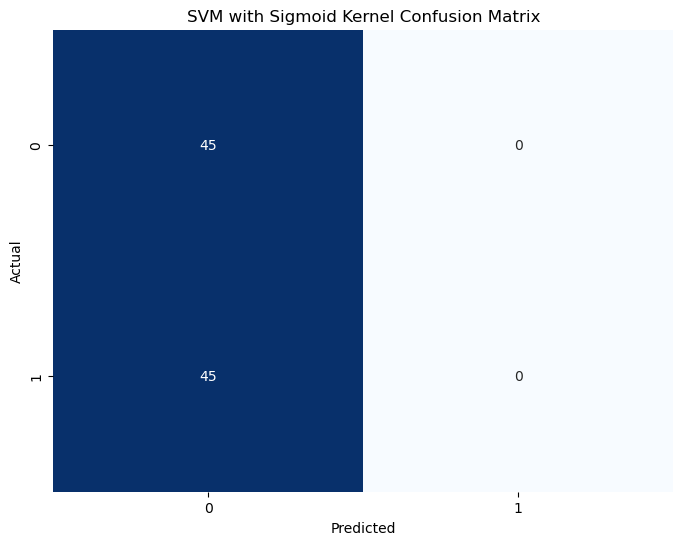

In [118]:
from sklearn.svm import SVC

# Initialize the SVM classifier with Sigmoid kernel
clf_svm_sigmoid = SVC(kernel='sigmoid', random_state=42)

# Train the classifier
clf_svm_sigmoid.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svm_sigmoid = clf_svm_sigmoid.predict(X_test)

# Generate confusion matrix for SVM with Sigmoid kernel
cm_svm_sigmoid = confusion_matrix(y_test, y_pred_svm_sigmoid)

# Calculate accuracy metrics for SVM with Sigmoid kernel
accuracy_svm_sigmoid = accuracy_score(y_test, y_pred_svm_sigmoid)
precision_svm_sigmoid = precision_score(y_test, y_pred_svm_sigmoid)
recall_svm_sigmoid = recall_score(y_test, y_pred_svm_sigmoid)
f1_svm_sigmoid = f1_score(y_test, y_pred_svm_sigmoid)

print("SVM with Sigmoid Kernel Confusion Matrix:")
print(cm_svm_sigmoid)
print("SVM with Sigmoid Kernel Accuracy:", accuracy_svm_sigmoid)
print("SVM with Sigmoid Kernel Precision:", precision_svm_sigmoid)
print("SVM with Sigmoid Kernel Recall:", recall_svm_sigmoid)
print("SVM with Sigmoid Kernel F1-score:", f1_svm_sigmoid)

# Plot confusion matrix heatmap for SVM with Sigmoid kernel
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm_sigmoid, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("SVM with Sigmoid Kernel Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# Step 10 | Model Comparison

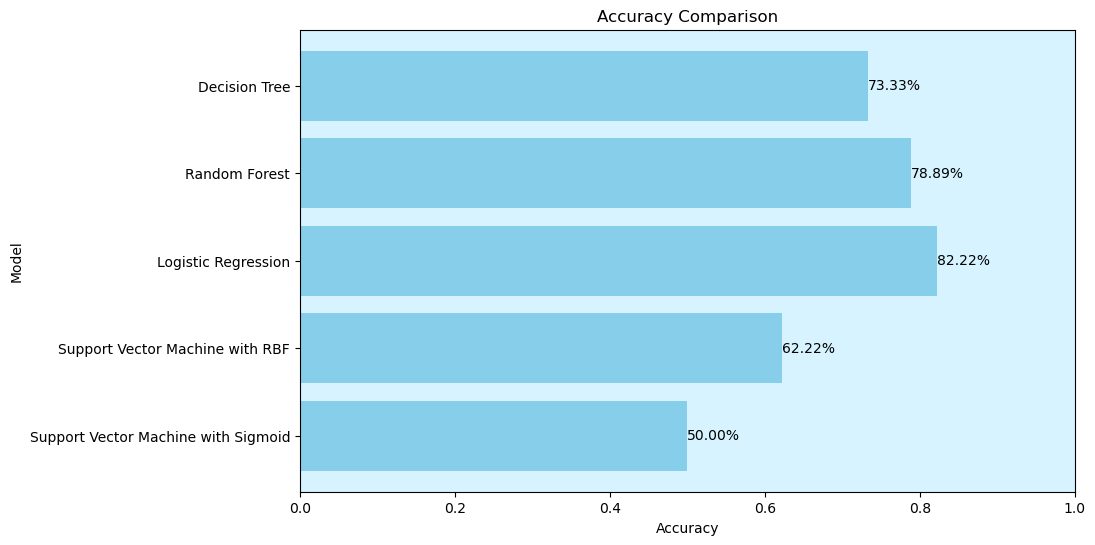

In [119]:
# List of classifiers and their corresponding accuracy scores
classifiers = ['Decision Tree', 'Random Forest', 'Logistic Regression', 'Support Vector Machine with RBF','Support Vector Machine with Sigmoid']
accuracies = [accuracy_decisiontree, accuracy_rf, accuracy_lr, accuracy_svm_rbf, accuracy_svm_sigmoid]
# Plotting the accuracy scores with percentages
plt.figure(figsize=(10, 6))
bars = plt.barh(classifiers, accuracies, color='skyblue')
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.title('Accuracy Comparison')
plt.xlim(0, 1)
plt.gca().invert_yaxis()  # Invert y-axis to have the highest accuracy at the top

# Percentage labels on each bar
for bar, accuracy in zip(bars, accuracies):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{accuracy*100:.2f}%', 
             va='center', ha='left', fontsize=10, color='black')

plt.show()



Logistic Regression: It achieved the highest accuracy among all the classifiers, indicating that it performed the best in terms of correctly predicting the classes in the test data. This suggests that logistic regression might be a suitable choice for this classification task given the features and dataset characteristics.

Support Vector Machine with Sigmoid Kernel: It exhibited the lowest accuracy among the classifiers tested. This indicates that the sigmoid kernel might not be the most appropriate choice for this particular dataset and classification problem. It's possible that the decision boundary generated by the sigmoid kernel did not effectively separate the classes in the feature space.

In conclusion, based on the accuracy comparison results, logistic regression appears to be the best-performing classifier for this dataset, while SVM with a sigmoid kernel seems to be the least effective.